# INDEX
#### 1) Data Preparation
#### 2) EDA
#### 2)i) Data Visualization
#### 3) Feature Engineering
#### 3)i) Numerical
#### 3)ii) Ordinal
#### 3)iii) Nominal
#### 4) Modelling and Evaluation
#### 4)a) Original
#### 4)b) Oversampling (SMOTE) 
#### 4)c) Features Selection (Recursive feature elimination)
#### 4)d) Ensemble learning

# Problem and Goal

### Claim related fraud is a huge problem in the insurance industry. It is quite complex and difficult to identify those unwanted claims. 

### The data is from Automobile Insurance and models will be develop that will predict if an insurance claim is fraudulent or not. The task is a Binary Classification. Models are being evaluated in order to determine the best model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate,StratifiedKFold,RepeatedStratifiedKFold
from IPython.display import display_html
from itertools import chain,cycle
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from numpy import mean
from sklearn.feature_selection import RFECV

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None) 

# 1) Data Preparation

In [2]:
df = pd.read_csv('insurance_claims.csv')
df1 = df

In [3]:
df1.shape

(1000, 39)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
df1.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17/10/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25/1/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27/6/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21/1/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,6/9/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22/2/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25/5/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10/1/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17/2/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [6]:
df1.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
995,3,38,941851,16/7/1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22/2/2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,5/1/2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24/1/2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17/2/2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23/1/2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18/11/2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26/2/2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N
999,456,60,556080,11/11/1996,OH,250/500,1000,766.19,0,612260,FEMALE,Associate,sales,kayaking,husband,0,0,26/2/2015,Parked Car,?,Minor Damage,Police,WV,Columbus,1416 Cherokee Ridge,6,1,?,0,3,?,5060,460,920,3680,Mercedes,E400,2007,N


# 2) Explotary Data Analysis (EDA)

## 2)i) Data Understanding

In [7]:
#Check if null values exist
df1.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [8]:
# identify variables with '?' values
unknowns = {}
for i in list(df.columns):
    if (df[i]).dtype == object:
        j = np.sum(df[i] == "?")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)

                           0
policy_bind_date           0
policy_state               0
policy_csl                 0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_date              0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
incident_location          0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0
fraud_reported             0


In [9]:
#Convert our label from Y/N to 1/0
df1['fraud_reported'] = df1['fraud_reported'].apply(lambda x:0 if x =='N' else 1)

In [10]:
#Check the categorical data distribution
cat_col = df1.select_dtypes(exclude=np.number).columns
for i in cat_col:
    print(print(f'\n========= {i} \n'))
    print(df1[i].value_counts())


========= policy_bind_date 

None
1/1/2006      3
28/4/1992     3
5/8/1992      3
14/12/1991    2
9/8/2004      2
             ..
3/6/2014      1
12/12/1998    1
18/2/1999     1
30/10/1997    1
11/11/1996    1
Name: policy_bind_date, Length: 951, dtype: int64

========= policy_state 

None
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

========= policy_csl 

None
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

========= insured_sex 

None
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

========= insured_education_level 

None
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

========= insured_occupation 

None
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71

In [11]:
df1.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000


<AxesSubplot:>

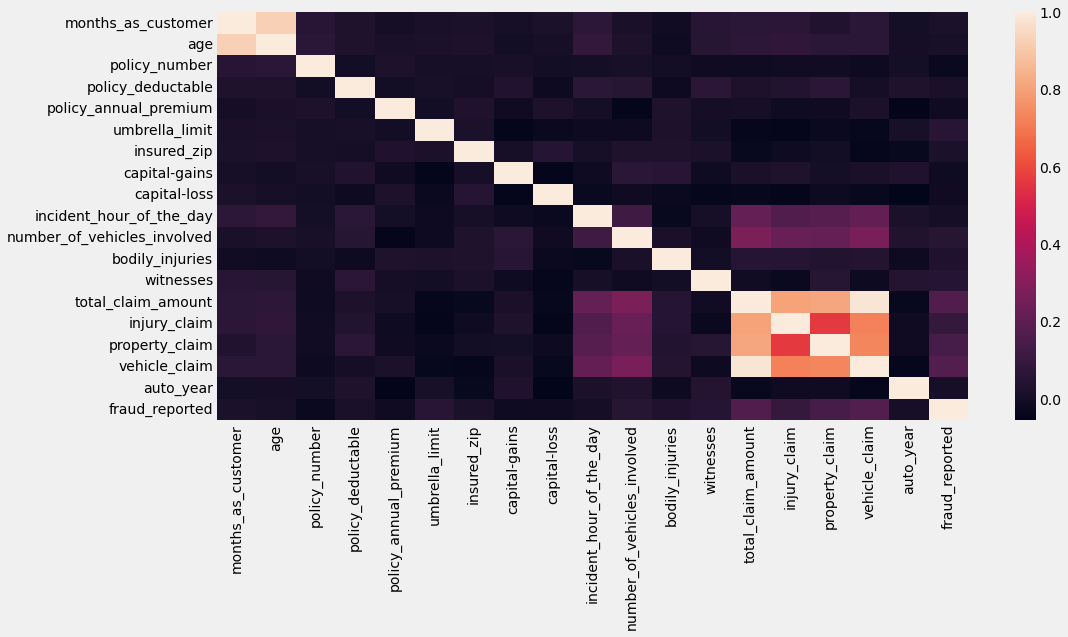

In [12]:
#plot the correlation using heatmap
plt.figure(figsize=(15,7))
sns.heatmap(df1.corr())

<AxesSubplot:>

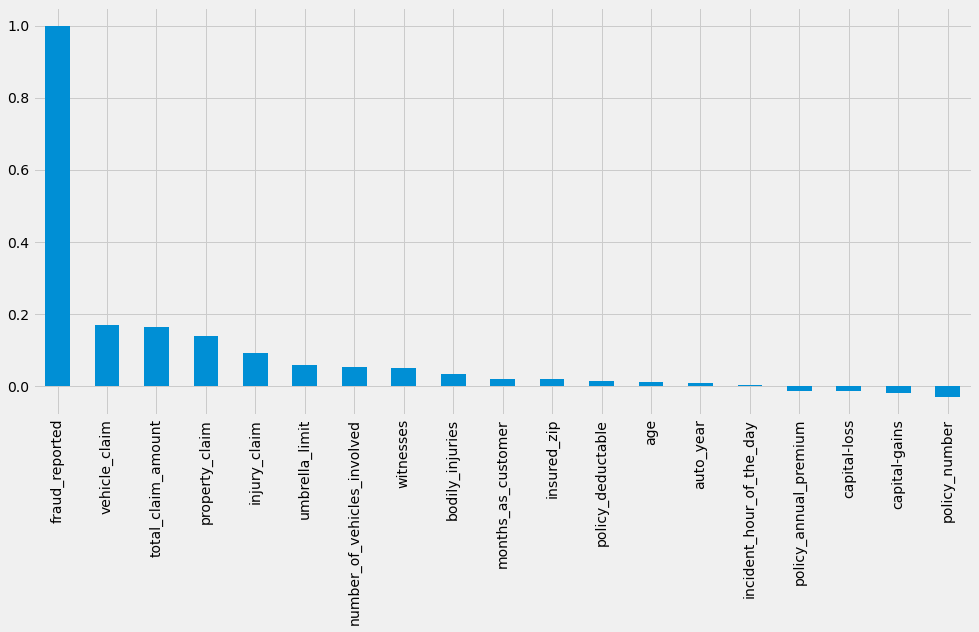

In [13]:
# Check the correlation of fraud_reported (label) with other attributes
plt.figure(figsize=(15,7))
df1.corr()['fraud_reported'].sort_values(ascending = False).plot(kind='bar')

# 2)ii) Data Visualization

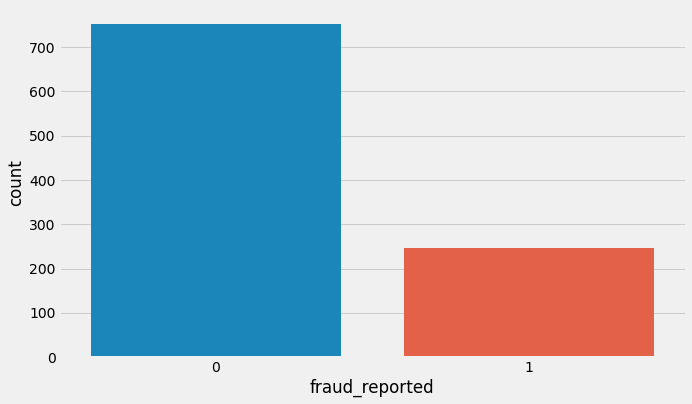

In [14]:
# Create a data frame with one column, "fraud_reported"
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='fraud_reported', data=df)
plt.show()

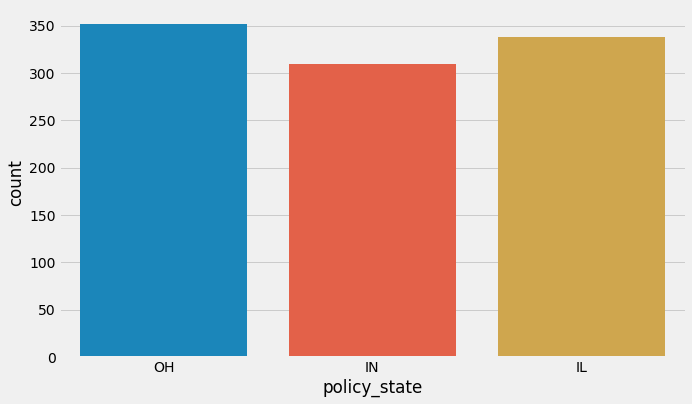

In [15]:
# Visualize column, "policy_state"
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='policy_state', data=df)
plt.show()

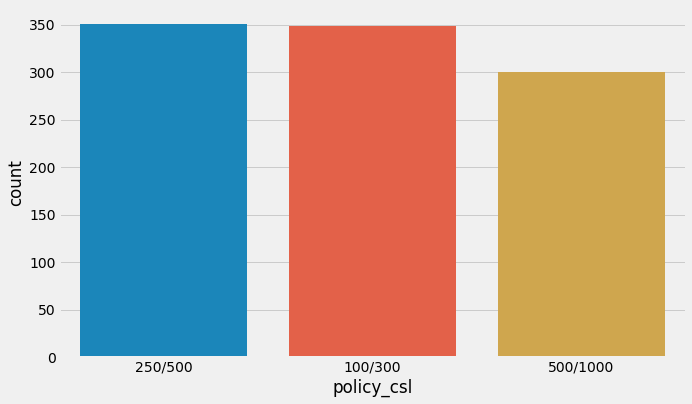

In [16]:
# Visualize column, "policy_csl"
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='policy_csl', data=df)
plt.show()

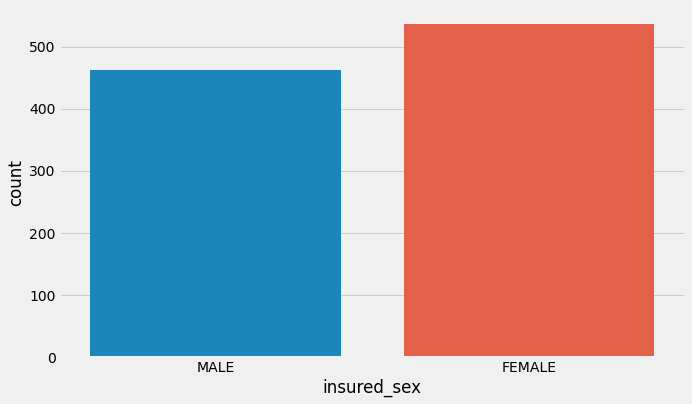

In [17]:
# Visualize column, "insured_sex"
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='insured_sex', data=df)
plt.show()

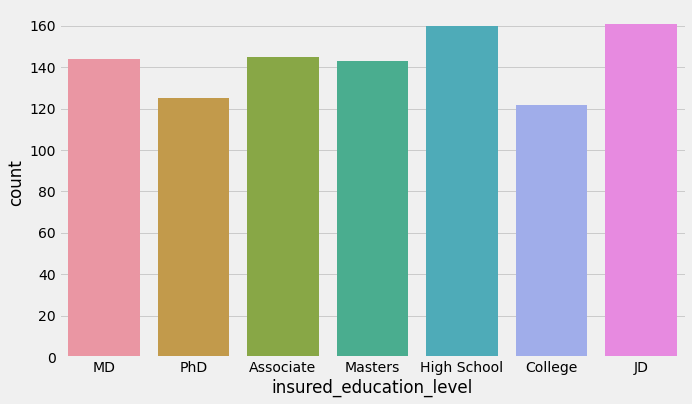

In [18]:
# Visualize column, "insured_education_level"
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='insured_education_level', data=df)
ax.set_xticklabels(ax.get_xticklabels())
plt.show()

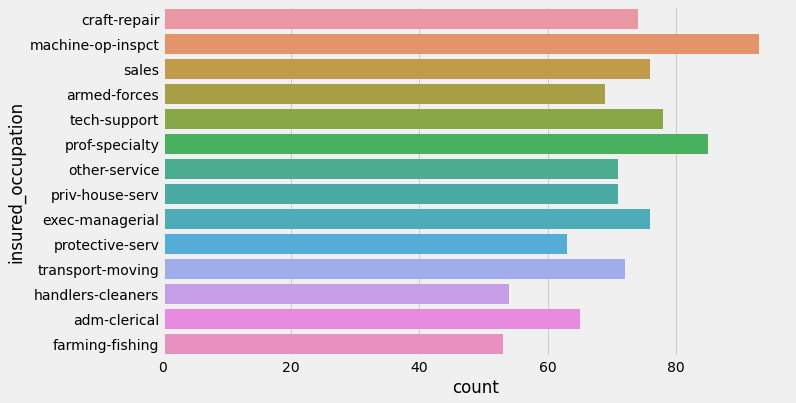

In [19]:
# Visualize column, "insured_occupation"
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y='insured_occupation', data=df)
plt.show()

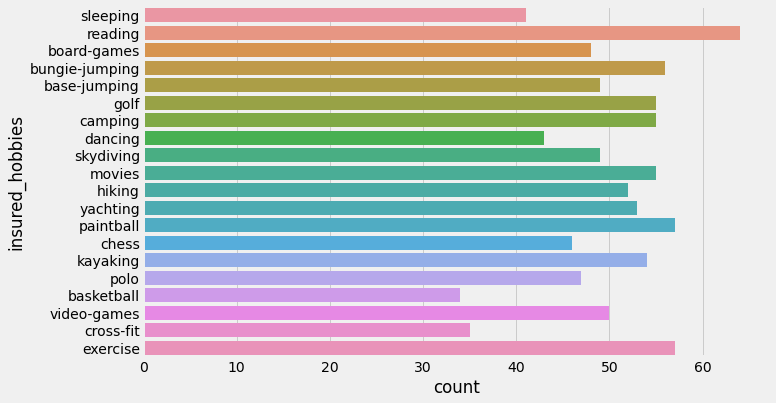

In [20]:
# Visualize column, "insured_hobbies"
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y='insured_hobbies', data=df)
plt.show()

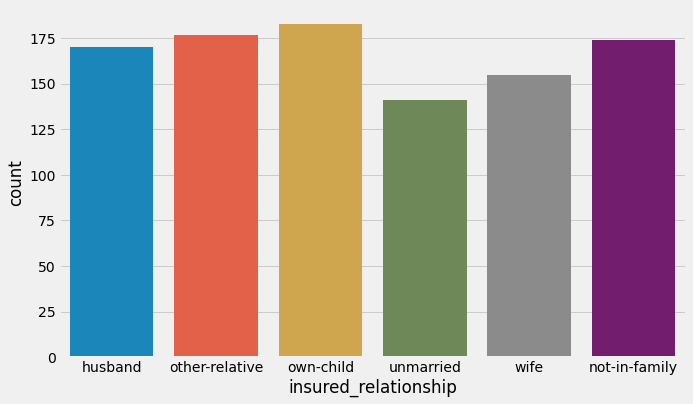

In [21]:
# Visualize column, "insured_relationship"
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='insured_relationship', data=df)
plt.show()

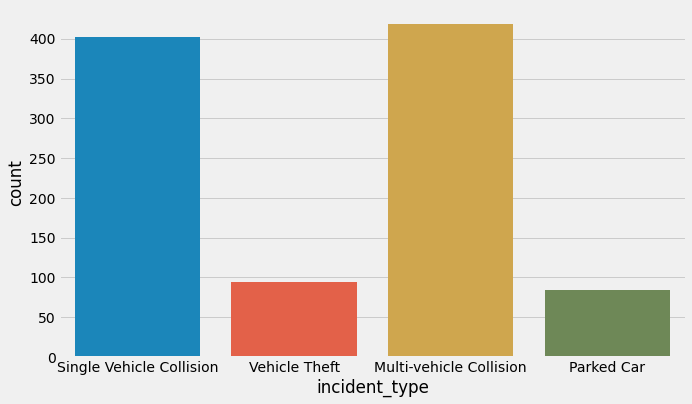

In [22]:
# Visualize column, "incident_type"
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='incident_type', data=df)
plt.show()

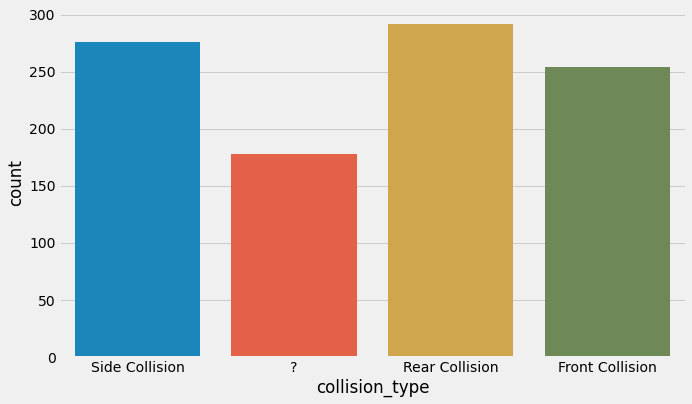

In [23]:
# Visualize column, "collision_type"
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='collision_type', data=df)
plt.show()

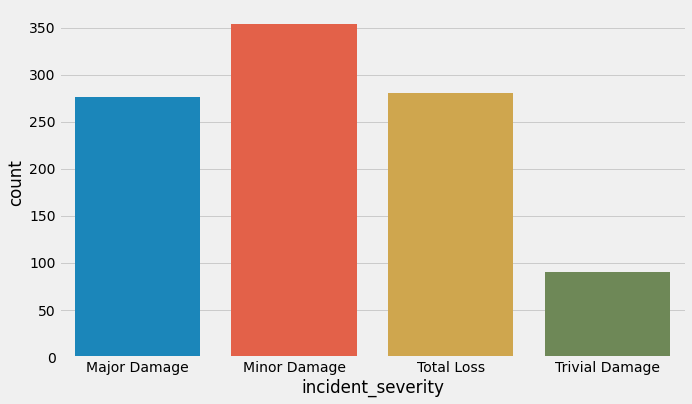

In [24]:
# Visualize column, "incident_severity"
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='incident_severity', data=df)
plt.show()

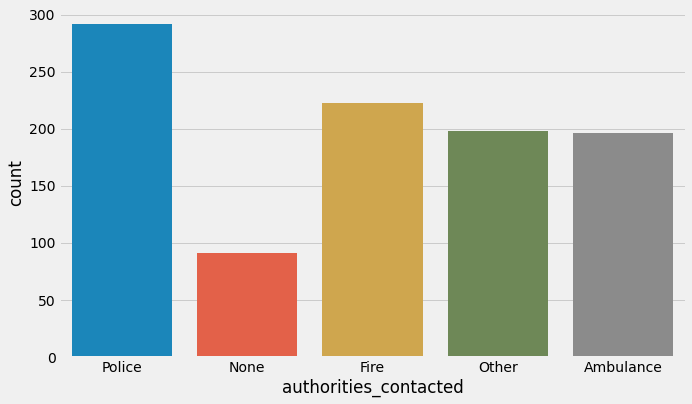

In [25]:
# Visualize column, "authorities_contacted"
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='authorities_contacted', data=df)
plt.show()

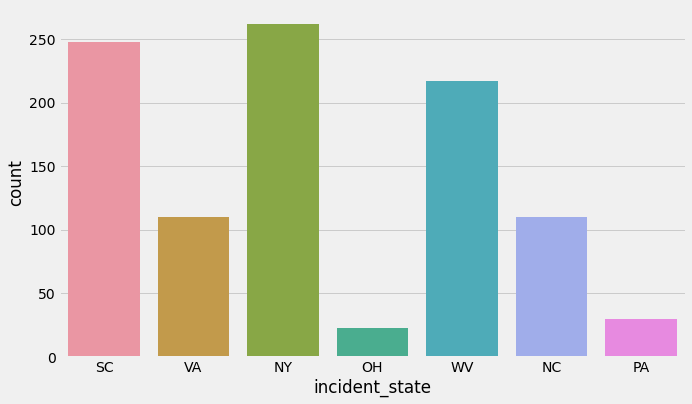

In [26]:
# Visualize column, "incident_state"
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='incident_state', data=df)
plt.show()

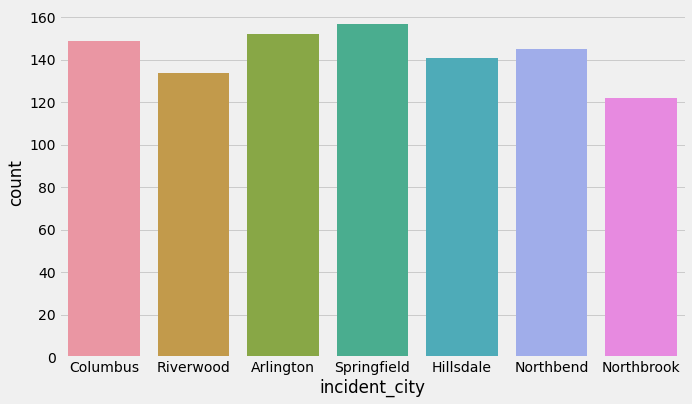

In [27]:
# Visualize column, "incident_city"
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='incident_city', data=df)
plt.show()

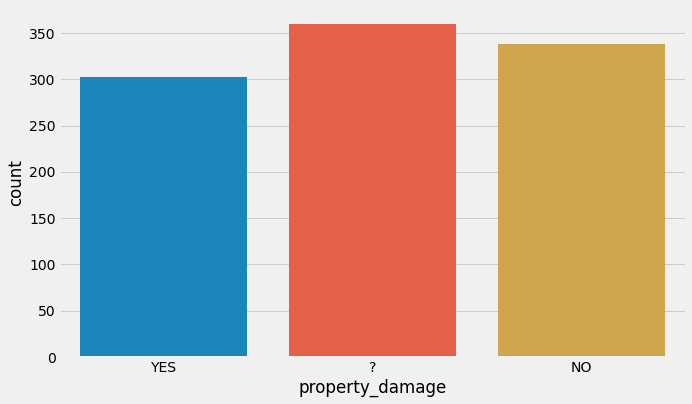

In [28]:
# Visualize column, "property_damage"
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='property_damage', data=df)

plt.show()

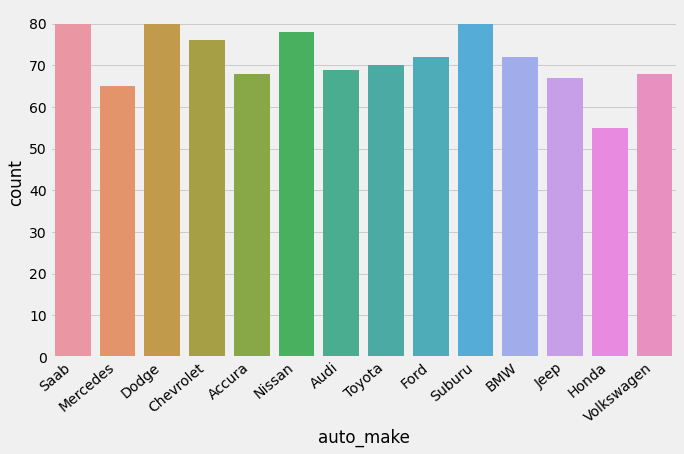

In [29]:
# Visualize column, "auto_make"
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='auto_make', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

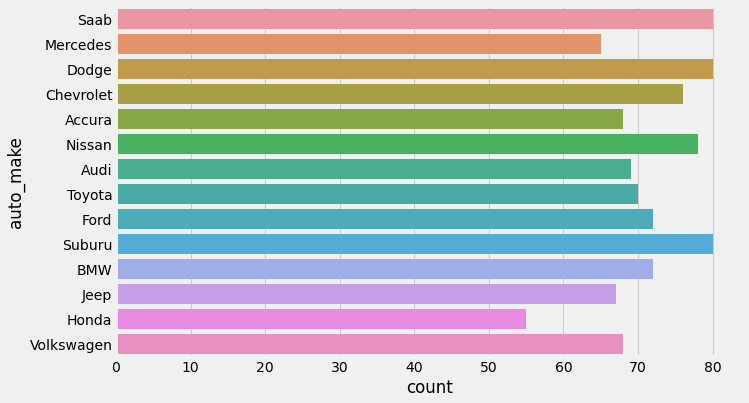

In [30]:
# Visualize column, "auto_model"
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y='auto_make', data=df)
plt.show()

# 3) Feature Engineering

In [31]:
#Convert the year of automobile produced to age of automobile
current_year = date.today().year
df1['auto_age'] = df1['auto_year'].apply(lambda x: current_year-int(x))

In [32]:
#drop useless columns
df1 = df1.drop(['policy_bind_date', 'policy_number','incident_date','incident_location','auto_year'], axis=1)

In [33]:
df1.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,auto_age
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,1,18
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,1,15
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,0,15
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,1,8
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,0,13


In [34]:
df1.shape

(1000, 35)

## 3) i) Numerical data
## Remove outliers + Normalization

In [35]:
#Extract numerical columns
num_col = df1.select_dtypes(include=np.number).columns
num_col = num_col.drop('fraud_reported')
num_col

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_age'],
      dtype='object')

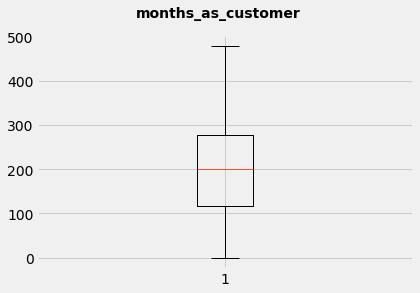

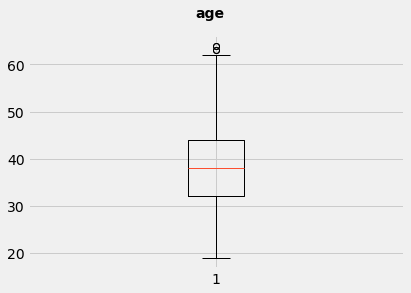

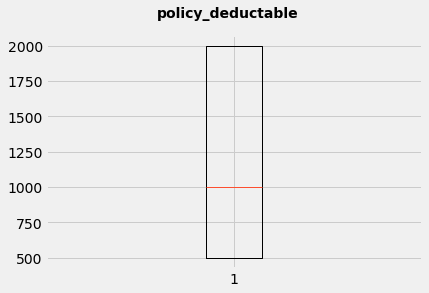

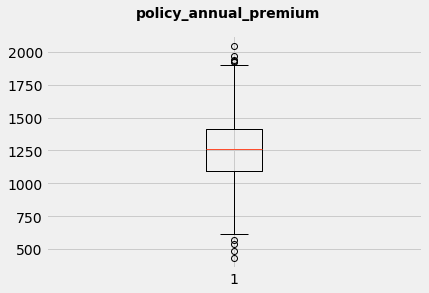

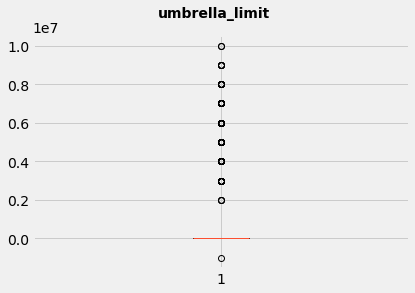

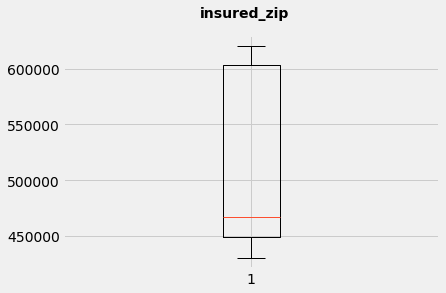

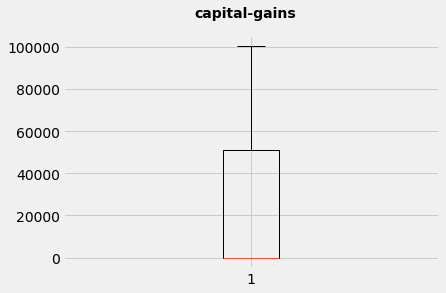

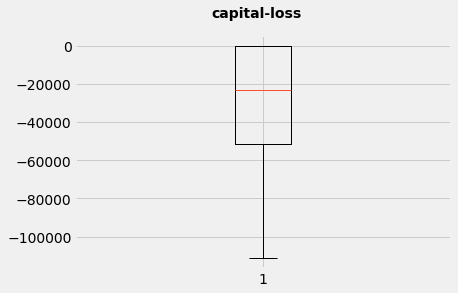

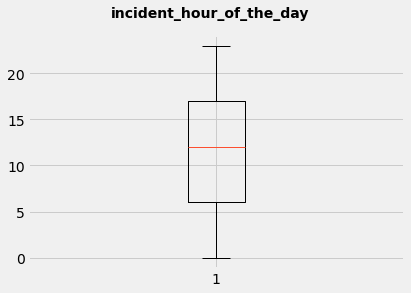

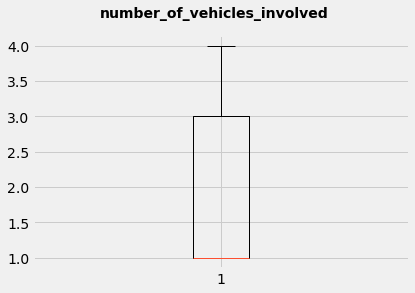

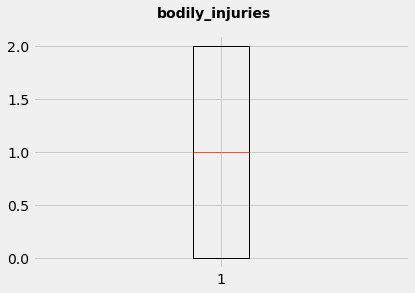

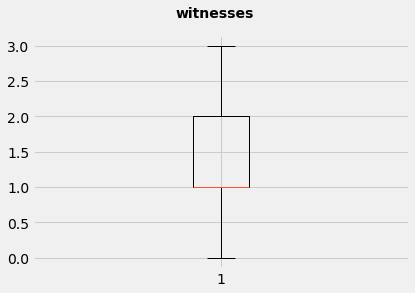

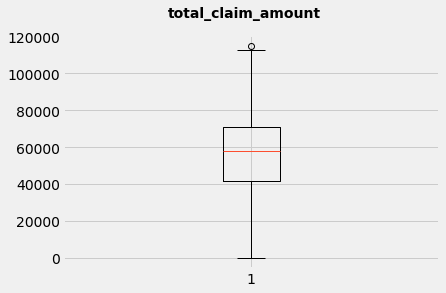

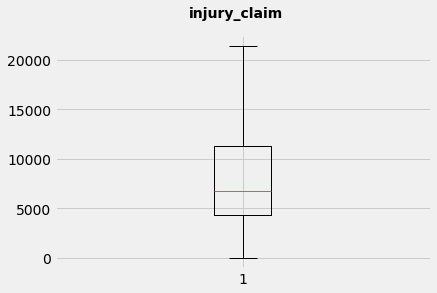

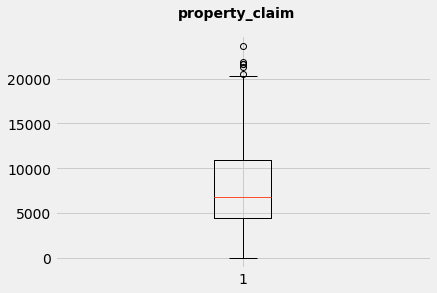

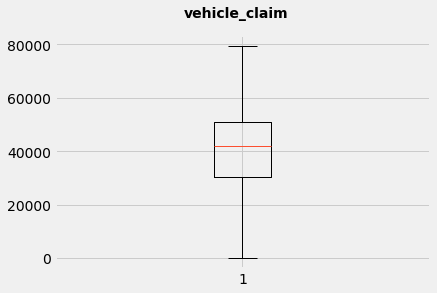

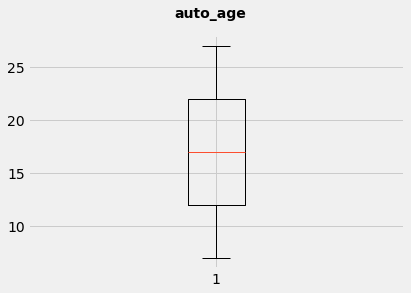

In [36]:
#Outliers detection
#Show data in boxplots
Numeric_dic = {}
for x in num_col:
    Numeric_dic[x]= df1[x].to_numpy()
    
for x in Numeric_dic:
    fig = plt.figure()
    fig.suptitle(x, fontsize=14, fontweight='bold')
    ax = fig.add_subplot(111)
    ax.boxplot(Numeric_dic[x])
    plt.show()

In [37]:
#Extract the specific columns which are required to deal with the outliers
out_num_col=['age','policy_annual_premium','total_claim_amount','property_claim']

In [38]:
#The data points that are lesser than the 10th percentile are replaced with the 10th percentile value 
#The data points that are greater than the 90th percentile are replaced with 90th percentile value.
for x in out_num_col:
    tenth_percentile = np.percentile(df1[x], 10)
    ninetieth_percentile = np.percentile(df1[x], 90)
    df1[x].values[df1[x] < tenth_percentile] = tenth_percentile
    df1[x].values[df1[x] > ninetieth_percentile] = ninetieth_percentile

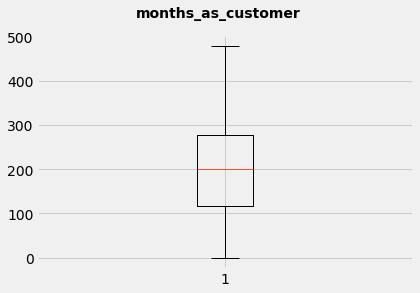

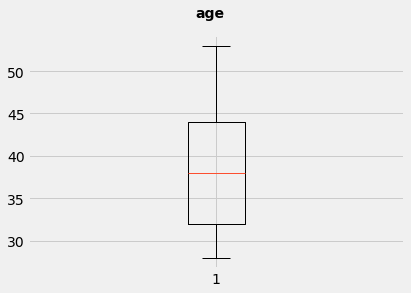

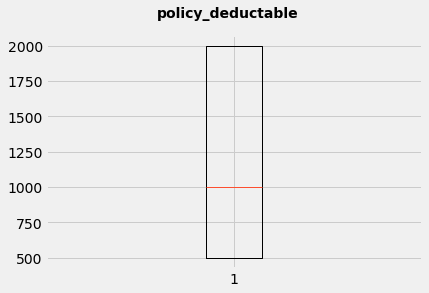

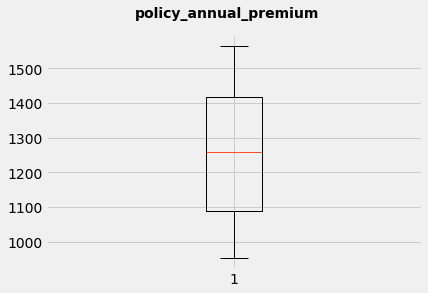

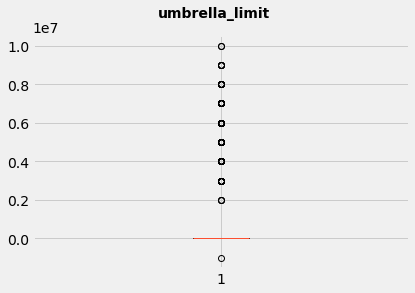

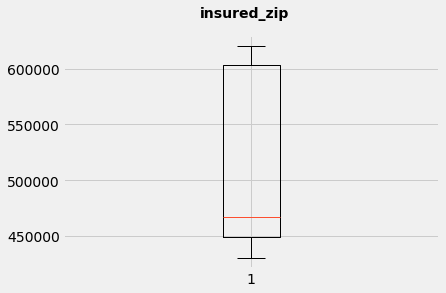

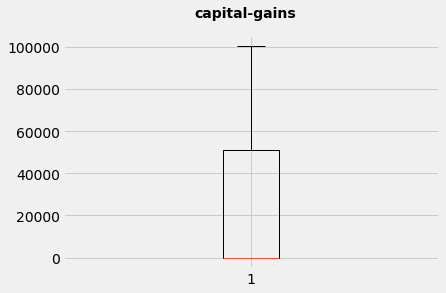

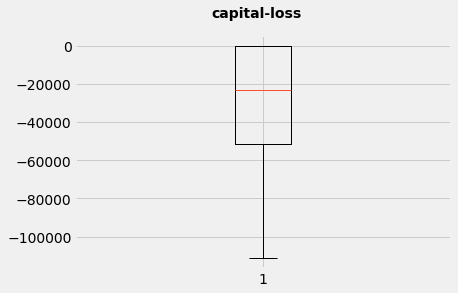

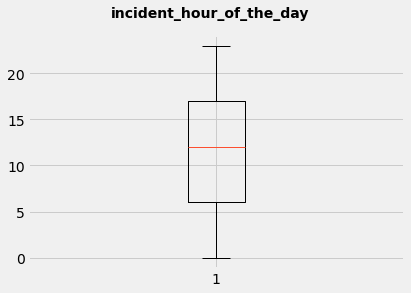

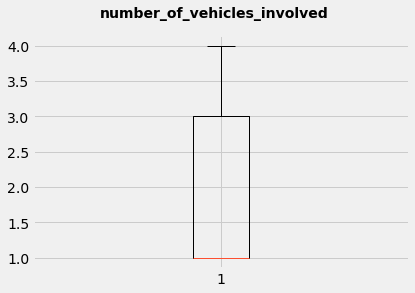

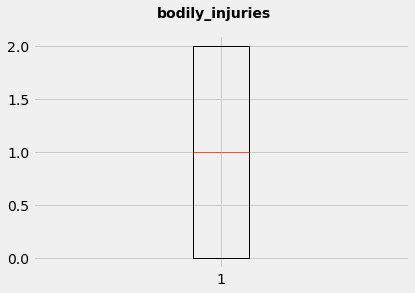

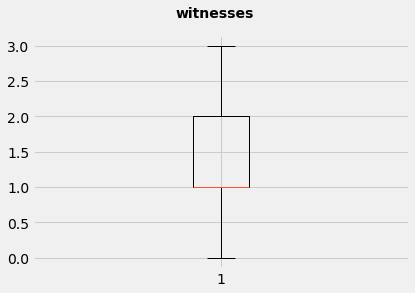

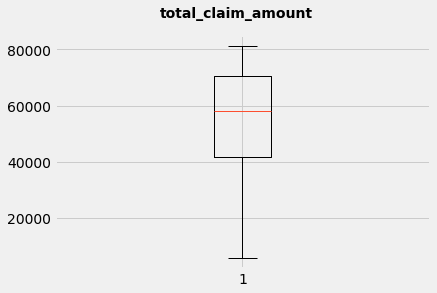

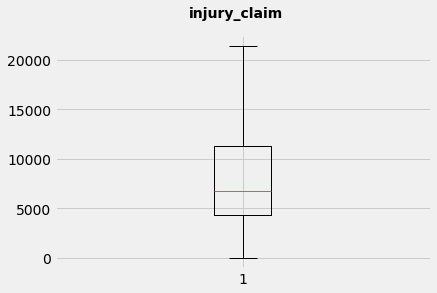

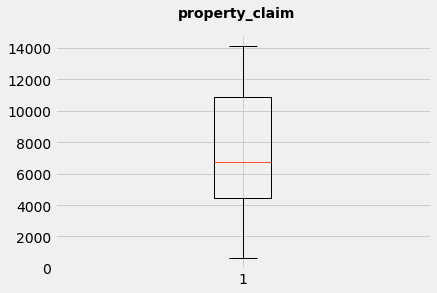

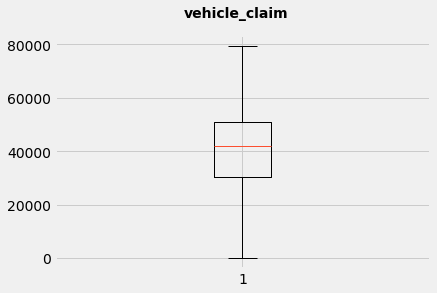

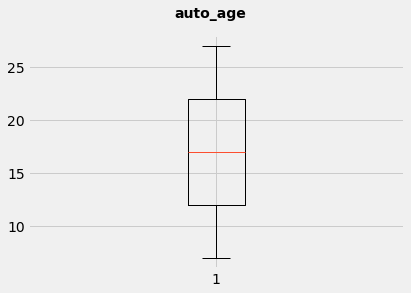

In [39]:
#Show data in boxplots
Numeric_dic = {}
for x in num_col:
    Numeric_dic[x]= df1[x].to_numpy()
    
for x in Numeric_dic:
    fig = plt.figure()
    fig.suptitle(x, fontsize=14, fontweight='bold')
    ax = fig.add_subplot(111)
    ax.boxplot(Numeric_dic[x])
    plt.show()

In [40]:
df_numeric = df[num_col]

In [41]:
# Normalization for numerical data type
# To avoid biases towards particular feature

features = df_numeric.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(df_numeric)
df_numeric = pd.DataFrame(scaler.transform(df_numeric))
df_numeric.columns = features

In [42]:
df_numeric.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_age
0,0.684760,0.644444,0.333333,0.603112,0.090909,0.188769,0.530348,1.000000,0.217391,0.000000,0.5,0.666667,0.622801,0.303497,0.550063,0.654296,0.55
1,0.475992,0.511111,1.000000,0.473214,0.545455,0.199478,0.000000,1.000000,0.347826,0.000000,0.0,0.000000,0.043285,0.036364,0.032953,0.043276,0.40
2,0.279749,0.222222,1.000000,0.606972,0.545455,0.002766,0.349254,1.000000,0.304348,0.666667,1.0,1.000000,0.300906,0.358974,0.162653,0.289722,0.40
3,0.534447,0.488889,1.000000,0.608582,0.636364,0.932699,0.486567,0.438344,0.217391,0.000000,0.5,0.666667,0.551298,0.295571,0.267850,0.637187,0.05
4,0.475992,0.555556,0.333333,0.712760,0.636364,0.946264,0.656716,0.585959,0.869565,0.000000,0.0,0.333333,0.055739,0.060606,0.027461,0.056359,0.30


## 3) ii) Ordinal data 
## Encode the ordinal data

In [43]:
df_ordinal = df1[['insured_education_level','incident_severity']]

In [44]:
pd.options.mode.chained_assignment = None 
education_scale_mapper = {"High School":1, "Associate":2, "College":3, "JD":4, "MD":5, "Masters":6, "PhD":7}
df_ordinal["insured_education_level"] = df_ordinal["insured_education_level"].replace(education_scale_mapper)

In [45]:
incident_severity_scale_mapper = {"Trivial Damage":1, "Minor Damage":2, "Major Damage":3, "Total Loss":4}
df_ordinal["incident_severity"] = df_ordinal["incident_severity"].replace(incident_severity_scale_mapper)

In [46]:
df_ordinal.head()

,insured_education_level,incident_severity
0,5,3
1,5,2
2,7,2
3,7,3
4,2,2


## 3) iii) Nominal Data
##  Perform One-hot encoding also known as dummy variable encoding since it creates one binary variable for each category.

In [47]:
#Extract nominal columns
cat_col = df1.select_dtypes(exclude=np.number).columns
cat_col = cat_col.drop('insured_education_level','incident_severity')
cat_col

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'property_damage',
       'police_report_available', 'auto_make', 'auto_model'],
      dtype='object')

In [48]:
df_nominal = df1[cat_col]

In [49]:
df_nominal = pd.get_dummies(df_nominal)
df_nominal.head()

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_?,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_?,property_damage_NO,property_damage_YES,police_report_available_?,police_report_available_NO,police_report_available_YES,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0

## 3) iv) Compile the data

In [50]:
#Compile all the data
df_numeric.reset_index(drop=True, inplace=True)
df_ordinal.reset_index(drop=True, inplace=True)
df_nominal.reset_index(drop=True, inplace=True)

merged_df = pd.concat([df1['fraud_reported'], df_numeric, df_ordinal, df_nominal],axis=1)

In [51]:
merged_df.head()

,fraud_reported,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_age,insured_education_level,incident_severity,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_?,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_?,property_damage_NO,property_damage_YES,police_report_available_?,police_report_available_NO,police_report_available_YES,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,1,0.684760,0.644444,0.333333,0.603112,0.090909,0.188769,0.530348,1.000000,0.217391,0.000000,0.5,0.666667,0.622801,0.303497,0.550063,0.654296,0.55,5,3,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.475992,0.511111,1.000000,0.473214,0.545455,0.199478,0.000000,1.000000,0.347826,0.000000,0.0,0.00

In [125]:
merged_df.tail()

,fraud_reported,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_age,insured_education_level,incident_severity,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_?,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_?,property_damage_NO,property_damage_YES,police_report_available_?,police_report_available_NO,police_report_available_YES,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
995,0,0.006263,0.422222,0.333333,0.543574,0.090909,0.006209,0.000000,1.0,0.869565,0.000000,0.0,0.333333,0.758579,0.813054,0.368399,0.767015,0.45,6,2,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
996,0,0.594990,0.488889,0.333333,0.621622,0.090909,0.933013,0.705473,1.0,1.000000,0.000000,1.0,1.000000,0

# 4) Modelling and Evaluation
## Models:
## Logistic Regression, Decision Tree, Support Vector Machine, Gradinet Boosting, XGBoost, and Random Forest.
### Since this is a imbalanced dataset, so precision, recall and F1 will be more important than accuracy.

##### Precision — What percent of your predictions were correct?

##### Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class, it is defined as the ratio of true positives to the sum of a true positive and false positive.

##### Precision:- Accuracy of positive predictions.

##### Precision = TP/(TP + FP)


##### Recall — What percent of the positive cases did you catch?

##### Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

##### Recall:- Fraction of positives that were correctly identified.

##### Recall = TP/(TP+FN)

##### F1 score — What percent of positive predictions were correct?

##### The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

##### F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [52]:
from sklearn.model_selection import cross_val_score, cross_val_predict
#Independent variables
X = merged_df.drop(columns = ['fraud_reported'])

#Dependent variable
y = merged_df['fraud_reported']

In [53]:
#Some important functions

def check_importance(model):

    importances = model.feature_importances_
    importance_dict = {'Feature' : list(X.columns),
                    'Feature Importance' : importances}

    importance_df = pd.DataFrame(importance_dict)
    importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
    return importance_df.sort_values(by=['Feature Importance'],ascending=False)

def plot_importance(model):

    fig = plt.figure(figsize = (15, 8))
    values =check_importance(model)[check_importance(model)['Feature Importance']>0]['Feature Importance'].values
    features = check_importance(model)[check_importance(model)['Feature Importance']>0]['Feature'].values
    plt.bar(features, values, width = 0.4)
    plt.xticks( rotation='vertical')
    plt.show()

def check_importance2(model):
    
    model.fit(X,y)
    importance_df = pd.concat([ pd.DataFrame(data =((X.columns).values).reshape(-1,1), columns = ['Feature']), pd.DataFrame(data =np.round(model.coef_,2).reshape(-1,1), columns = ['Feature Importance'])], axis=1 )
    importance_df.sort_values(by=['Feature Importance'],ascending=False, inplace = True)
    return importance_df

def plot_importance2(model):
    
    fig = plt.figure(figsize = (15, 8))
    importance_df = check_importance2(model)
    values =importance_df[importance_df['Feature Importance']>0]['Feature Importance'].values
    features = importance_df[importance_df['Feature Importance']>0]['Feature'].values
    plt.bar(features, values, width = 0.4)
    plt.xticks( rotation='vertical')
    plt.show()

In [54]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = ['accuracy','precision', 'recall', 'f1']
keys = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']

## 4)a) Original

## 4)a)i) Logistic Regression

In [55]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression

clf_LR = LogisticRegression(max_iter=1000)

#evaluate model
scores = cross_validate(clf_LR, X, y, scoring=scoring, cv=cv, n_jobs=-1)
print('Logistic Regression:')
print('Mean F1 score: %.3f' % mean(scores['test_f1']))

#Scores
lr_scores = []
for i in keys:
    lr_scores.append(mean(scores[i]))

Logistic Regression:
Mean F1 score: 0.615


In [56]:
#Check the feature importance
clf_LR.fit(X,y)
check_importance2(clf_LR)

,Feature,Feature Importance
46,insured_hobbies_chess,3.47
47,insured_hobbies_cross-fit,2.64
75,incident_severity_Major Damage,2.30
4,umbrella_limit,1.01
128,auto_model_Civic,0.95
...,...,...
154,auto_model_Wrangler,-0.85
48,insured_hobbies_dancing,-1.03
58,insured_hobbies_sleeping,-1.20
77,incident_severity_Total Loss,-1.22


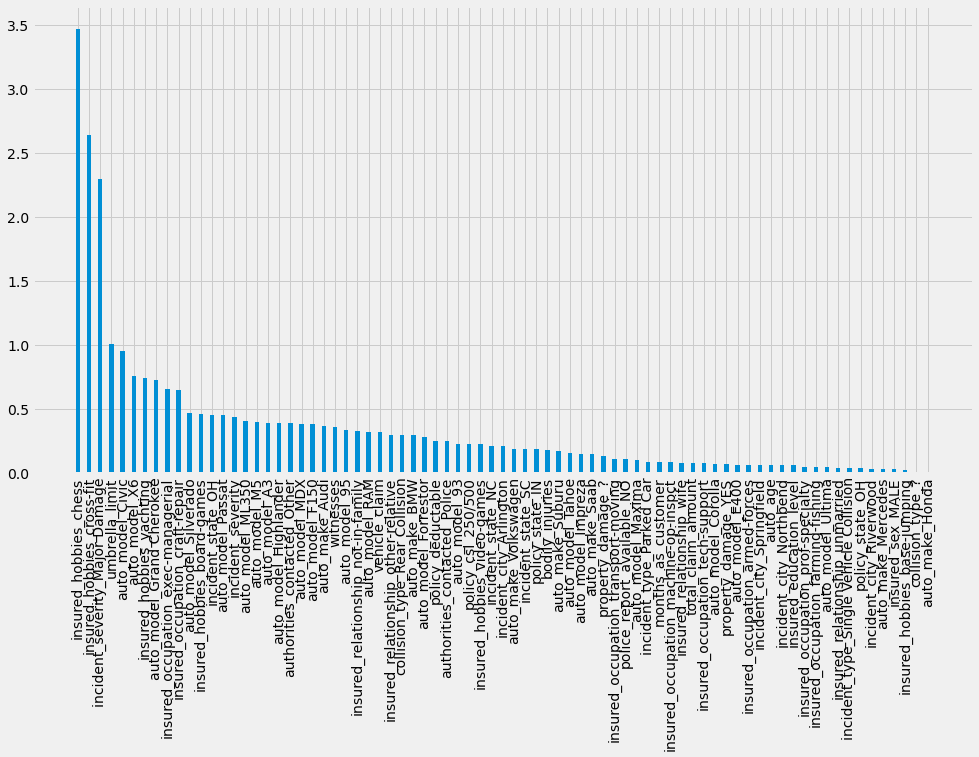

In [57]:
#Visualize the feature importance
plot_importance2(clf_LR)

## 4)a)ii) Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

clf_DT = DecisionTreeClassifier(criterion="entropy")

#evaluate model
scores = cross_validate(clf_DT, X, y, scoring=scoring, cv=cv, n_jobs=-1)
print('Decision Tree:')
print('Mean F1 score: %.3f' % mean(scores['test_f1']))

#Scores

dt_scores = []
for i in keys:
    dt_scores.append(mean(scores[i]))

Decision Tree:
Mean F1 score: 0.571


In [59]:
#Check the feature importance
clf_DT.fit(X,y)
check_importance(clf_DT)

,Feature,Feature Importance
75,incident_severity_Major Damage,0.22
46,insured_hobbies_chess,0.11
47,insured_hobbies_cross-fit,0.09
14,property_claim,0.06
12,total_claim_amount,0.05
...,...,...
58,insured_hobbies_sleeping,0.00
57,insured_hobbies_skydiving,0.00
56,insured_hobbies_reading,0.00
55,insured_hobbies_polo,0.00


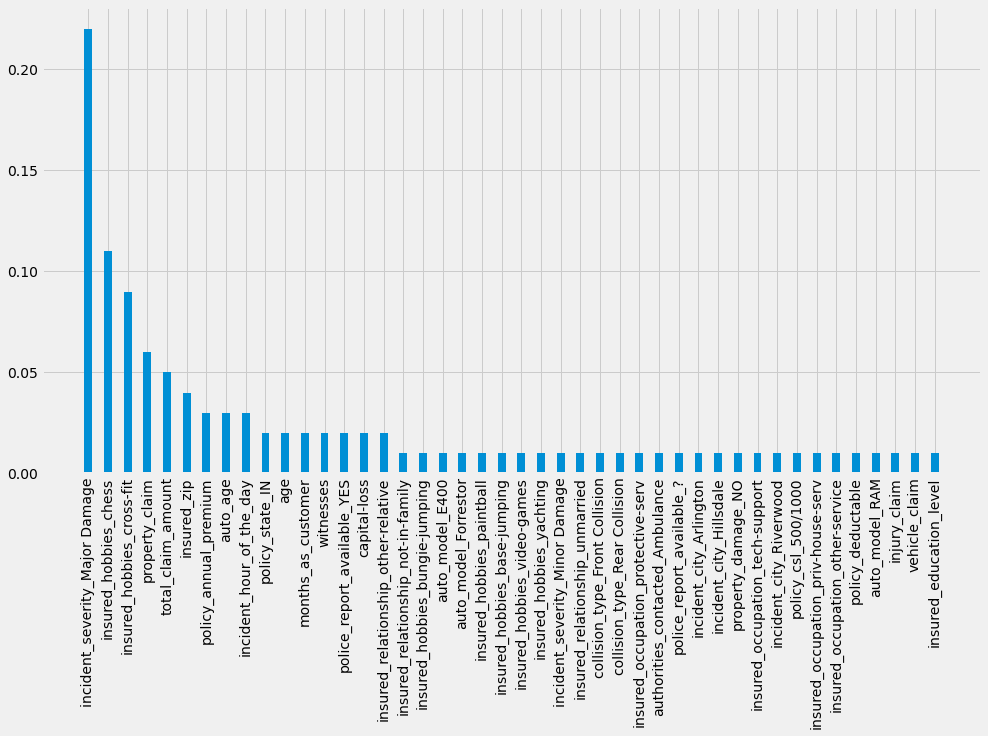

In [60]:
#Visualize the feature importance
plot_importance(clf_DT)

## 4)a)iii) Support Vector Machine (SVM)

In [61]:
from sklearn import svm

clf_SVM = svm.SVC(kernel='linear')

#evaluate model
scores = cross_validate(clf_SVM, X, y, scoring=scoring, cv=cv, n_jobs=-1)
print('SVM:')
print('Mean F1 score: %.3f' % mean(scores['test_f1']))

#Scores
svm_scores = []
for i in keys:
    svm_scores.append(mean(scores[i]))

SVM:
Mean F1 score: 0.656


In [62]:
#Check the feature importance
clf_SVM.fit(X,y)
check_importance2(clf_SVM)

,Feature,Feature Importance
46,insured_hobbies_chess,3.00
47,insured_hobbies_cross-fit,2.22
75,incident_severity_Major Damage,1.57
135,auto_model_Grand Cherokee,0.65
156,auto_model_X6,0.62
...,...,...
154,auto_model_Wrangler,-0.81
77,incident_severity_Total Loss,-0.83
147,auto_model_Pathfinder,-0.89
58,insured_hobbies_sleeping,-1.28


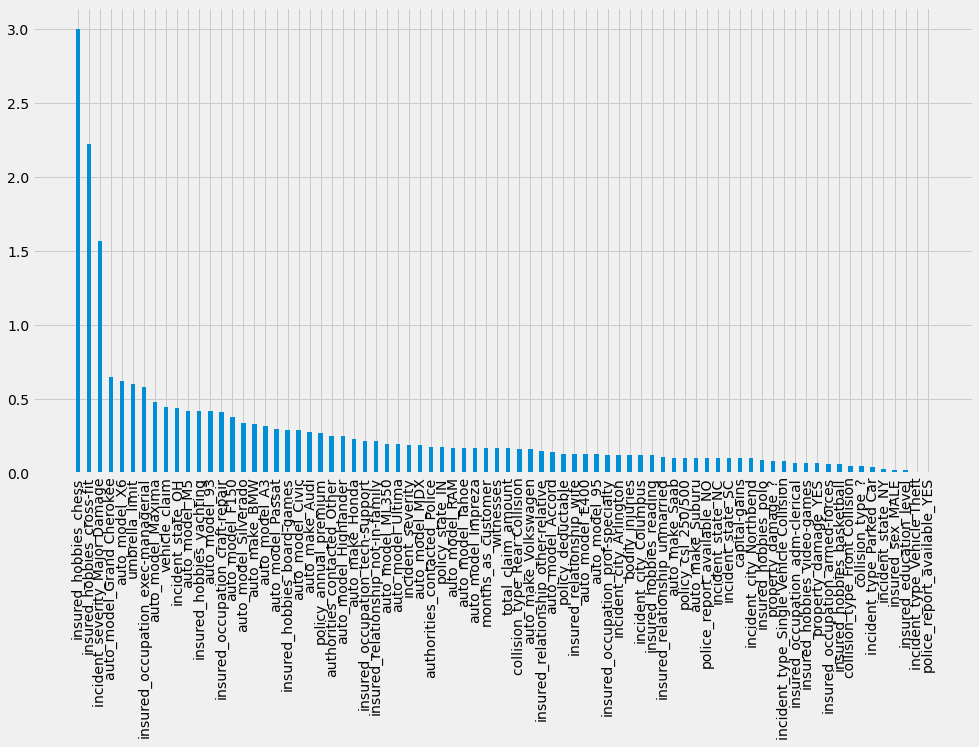

In [63]:
#Visualize the feature importance
plot_importance2(clf_SVM)

## 4)a)iv)  Gradient Boosting

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

clf_GB = GradientBoostingClassifier()

#evaluate model
scores = cross_validate(clf_GB, X, y, scoring=scoring, cv=cv, n_jobs=-1)
print('Gradient Boosting:')
print('Mean F1 score: %.3f' % mean(scores['test_f1']))

#Scores
gb_scores = []
for i in keys:
    gb_scores.append(mean(scores[i]))

Gradient Boosting:
Mean F1 score: 0.662


In [65]:
#Check the feature importance
clf_GB.fit(X,y)
check_importance(clf_GB)

,Feature,Feature Importance
75,incident_severity_Major Damage,0.37
46,insured_hobbies_chess,0.17
47,insured_hobbies_cross-fit,0.11
5,insured_zip,0.04
14,property_claim,0.03
...,...,...
55,insured_hobbies_polo,0.00
54,insured_hobbies_paintball,0.00
53,insured_hobbies_movies,0.00
52,insured_hobbies_kayaking,0.00


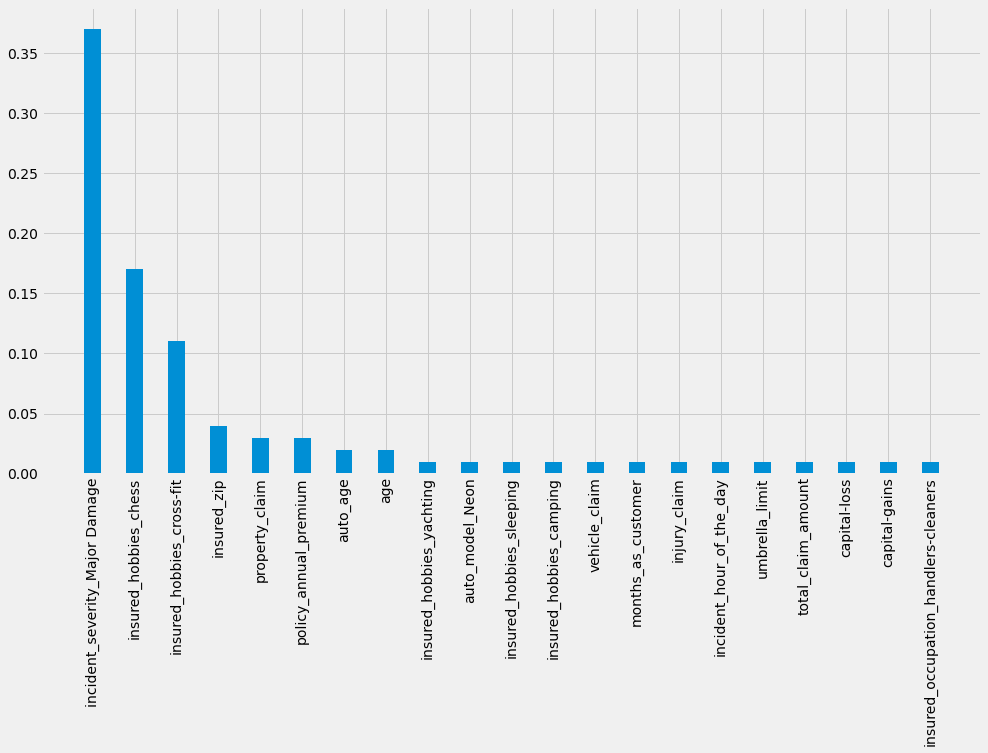

In [66]:
#Visualize the feature importance
plot_importance(clf_GB)

## 4)a)v) XGBoost

In [67]:
from xgboost import XGBClassifier

clf_XGB = XGBClassifier()

#evaluate model
scores = cross_validate(clf_XGB, X, y, scoring=scoring, cv=cv, n_jobs=-1)
print('XGBoost:')
print('Mean F1 score: %.3f' % mean(scores['test_f1']))

#Scores
xgb_scores = []
for i in keys:
    xgb_scores.append(mean(scores[i]))

XGBoost:
Mean F1 score: 0.617


In [68]:
#Check the feature importance
clf_XGB.fit(X,y)
check_importance(clf_XGB)

,Feature,Feature Importance
75,incident_severity_Major Damage,0.10
46,insured_hobbies_chess,0.06
47,insured_hobbies_cross-fit,0.05
54,insured_hobbies_paintball,0.04
36,insured_occupation_prof-specialty,0.02
...,...,...
67,incident_type_Multi-vehicle Collision,0.00
64,insured_relationship_own-child,0.00
57,insured_hobbies_skydiving,0.00
56,insured_hobbies_reading,0.00


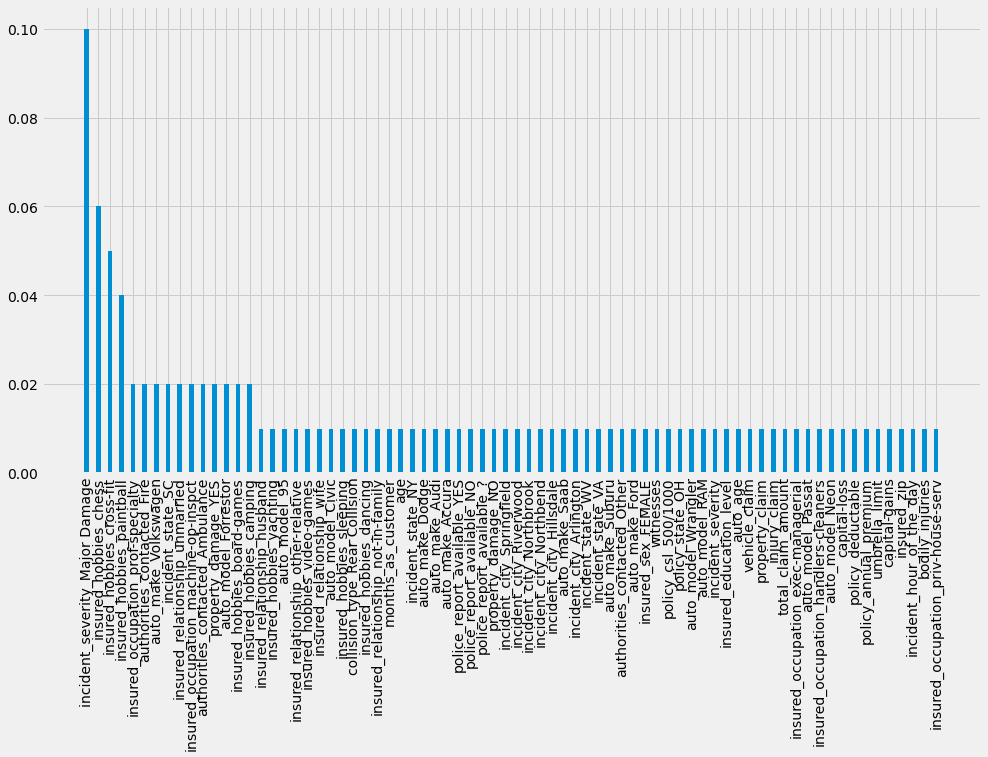

In [69]:
#Visualize the feature importance
plot_importance(clf_XGB)

## 4)a)vi) Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier()

#evaluate model
scores = cross_validate(clf_RF, X, y, scoring=scoring, cv=cv, n_jobs=-1)
print('Random Forest:')
print('Mean F1 score: %.3f' % mean(scores['test_f1']))

#Scores
rf_scores = []
for i in keys:
    rf_scores.append(mean(scores[i]))

Random Forest:
Mean F1 score: 0.509


In [71]:
#Check the feature importance
clf_RF.fit(X,y)
check_importance(clf_RF)

,Feature,Feature Importance
75,incident_severity_Major Damage,0.10
18,incident_severity,0.05
46,insured_hobbies_chess,0.04
12,total_claim_amount,0.03
77,incident_severity_Total Loss,0.03
...,...,...
59,insured_hobbies_video-games,0.00
58,insured_hobbies_sleeping,0.00
57,insured_hobbies_skydiving,0.00
56,insured_hobbies_reading,0.00


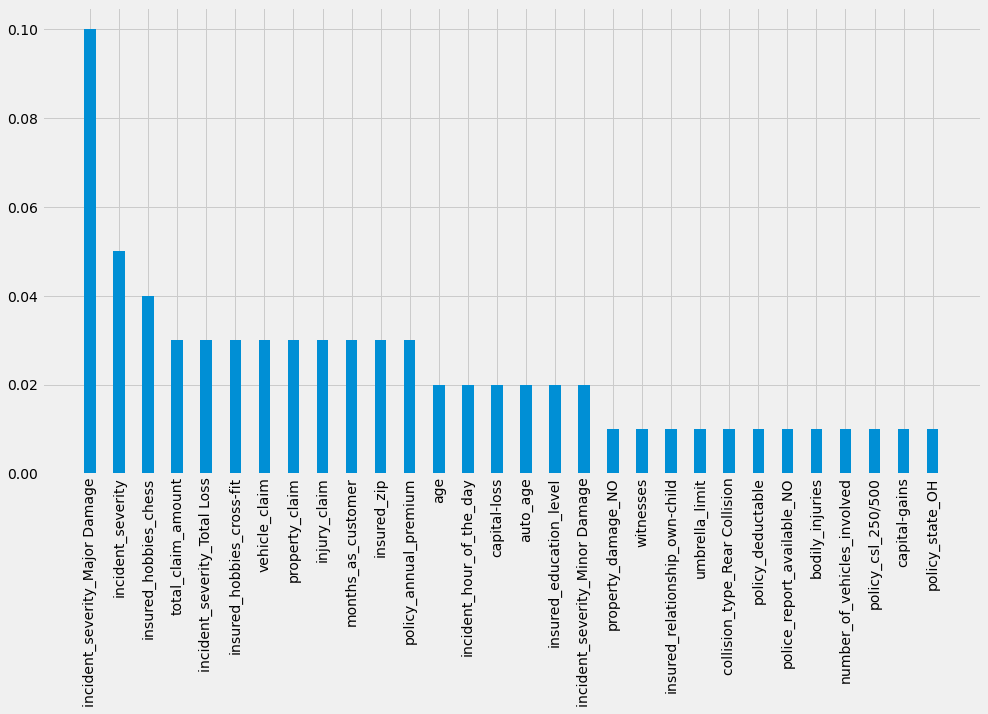

In [72]:
#Visualize the feature importance
plot_importance(clf_RF)

# The F1 scores are relatively low for all the proposed methods due to imbalanced data set and high dimensionality of the data.

In [73]:
scores_ = [("Random Forest", rf_scores[0], rf_scores[1], rf_scores[2], rf_scores[3]),
           ("Logistic Regression", lr_scores[0], lr_scores[1], lr_scores[2], lr_scores[3]),
           ("Decison Tree", dt_scores[0], dt_scores[1], dt_scores[2], dt_scores[3]),
           ("SVM", svm_scores[0], svm_scores[1], svm_scores[2], svm_scores[3]),
           ("Gradient Boosting", gb_scores[0], gb_scores[1], gb_scores[2], gb_scores[3]),
           ("XGBoost", xgb_scores[0], xgb_scores[1], xgb_scores[2], xgb_scores[3])]

Scores_ =pd.DataFrame(data = scores_, columns=['Model Name', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
Scores_.set_index('Model Name', inplace = True)

Scores_

,Accuracy,Precision,Recall,F1 Score
Model Name,,,,
Random Forest,0.7886,0.600843,0.450633,0.508663
Logistic Regression,0.8226,0.665791,0.581167,0.615009
Decison Tree,0.7892,0.575663,0.573833,0.570867
SVM,0.8320,0.668412,0.652500,0.656027
Gradient Boosting,0.8276,0.643897,0.686533,0.661772
XGBoost,0.8158,0.636987,0.604500,0.616953


### Original:
### TOP 3 MODELS: Gradient Boosting, SVM, and XGBoost

## 4)b) Perform resample the data (SMOTE)
## Oversample minority class (Add more sample to the minority class)
#### SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. 

## 4)b)i) Logistic Regression (Oversampling)

In [74]:
steps = [('over', SMOTE(n_jobs=-1)), ('model', LogisticRegression(max_iter=1000))]
clf_LR = Pipeline(steps=steps)

#Evaluate pipeline
scores = cross_validate(clf_LR, X, y, scoring=scoring, cv=cv, n_jobs=-1)
print('Logistic Regression (SMOTE)')
print('Mean F1 score: %.3f' % mean(scores['test_f1']))

#Scores
lr_scores_r = []
for i in keys:
    lr_scores_r.append(mean(scores[i]))

Logistic Regression (SMOTE)
Mean F1 score: 0.627


In [75]:
#Check the feature importance
clf_LR = LogisticRegression(max_iter=1000)
clf_LR.fit(X,y)
check_importance2(clf_LR)

,Feature,Feature Importance
46,insured_hobbies_chess,3.47
47,insured_hobbies_cross-fit,2.64
75,incident_severity_Major Damage,2.30
4,umbrella_limit,1.01
128,auto_model_Civic,0.95
...,...,...
154,auto_model_Wrangler,-0.85
48,insured_hobbies_dancing,-1.03
58,insured_hobbies_sleeping,-1.20
77,incident_severity_Total Loss,-1.22


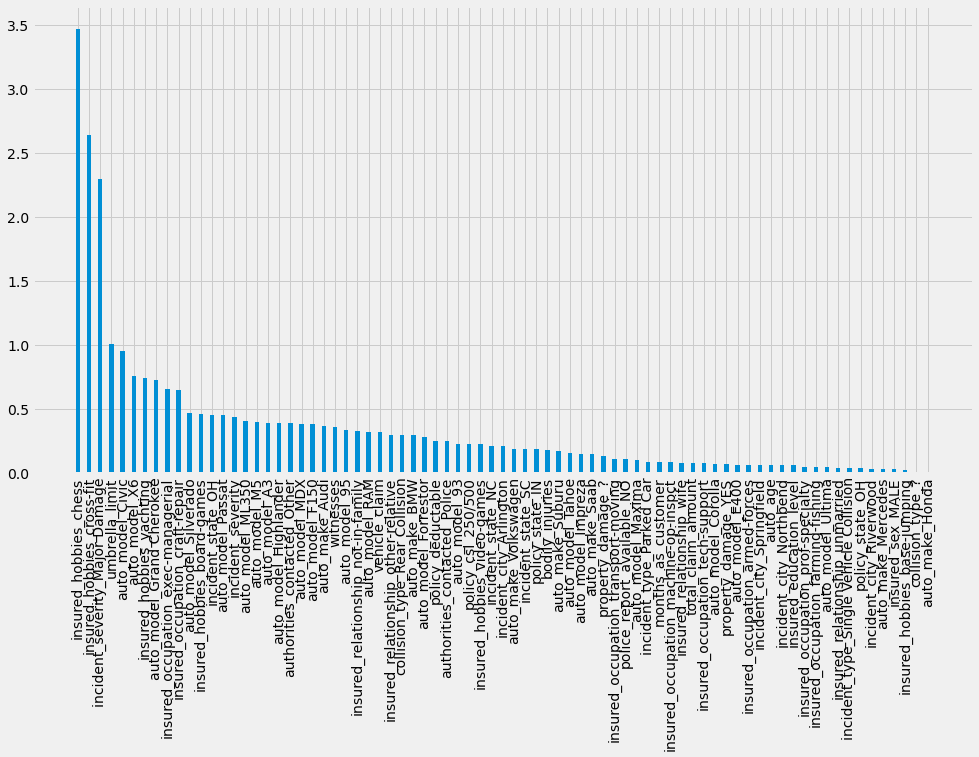

In [76]:
#Visualize the feature importance
plot_importance2(clf_LR)

## 4)b)ii) Decision Tree (Oversampling)

In [77]:
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier(criterion="entropy"))]
clf_DT = Pipeline(steps=steps)

# evaluate pipeline
scores = cross_validate(clf_DT, X, y, scoring=scoring, cv=cv, n_jobs=-1)
print('Decision Tree (SMOTE)')
print('Mean F1 score: %.3f' % mean(scores['test_f1']))

#Scores
dt_scores_r = []
for i in keys:
    dt_scores_r.append(mean(scores[i]))

Decision Tree (SMOTE)
Mean F1 score: 0.561


In [78]:
#Check the feature importance
clf_DT = DecisionTreeClassifier(criterion="entropy")
clf_DT.fit(X,y)
check_importance(clf_DT)

,Feature,Feature Importance
75,incident_severity_Major Damage,0.22
46,insured_hobbies_chess,0.11
47,insured_hobbies_cross-fit,0.09
14,property_claim,0.07
5,insured_zip,0.05
...,...,...
57,insured_hobbies_skydiving,0.00
55,insured_hobbies_polo,0.00
53,insured_hobbies_movies,0.00
52,insured_hobbies_kayaking,0.00


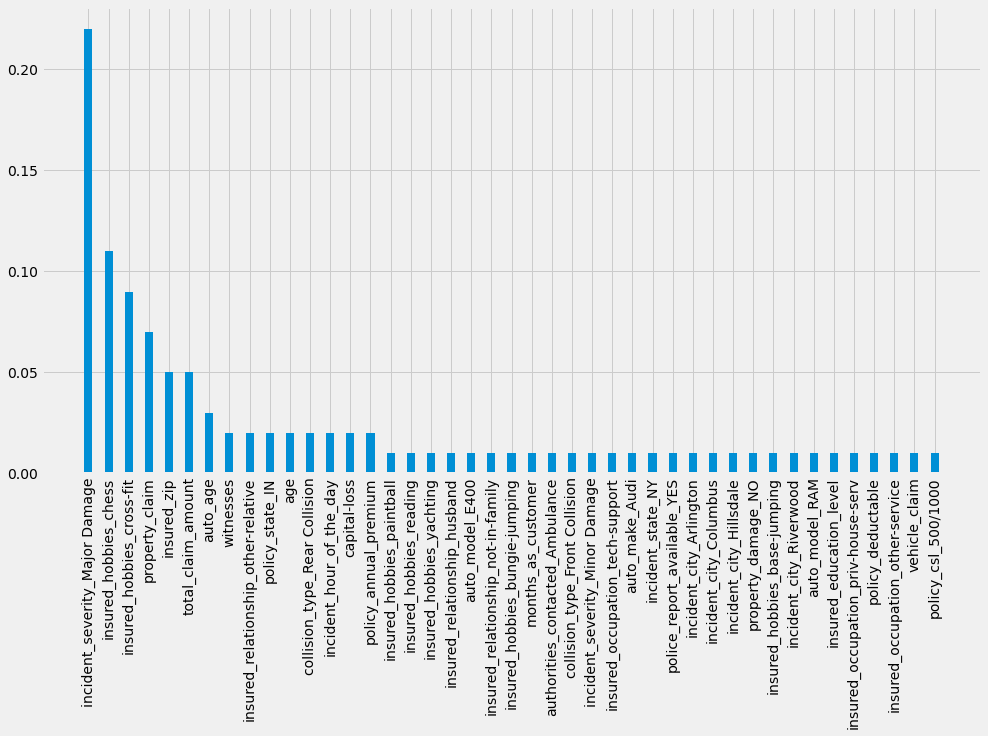

In [79]:
#Visualize the feature importance
plot_importance(clf_DT)

## 4)b)iii) SVM (Oversampling)

In [80]:
steps = [('over', SMOTE()), ('model', svm.SVC(kernel='linear'))]
clf_SVM = Pipeline(steps=steps)

# evaluate pipeline
scores = cross_validate(clf_SVM, X, y, scoring=scoring, cv=cv, n_jobs=-1)
print('SVM (SMOTE)')
print('Mean F1 score: %.3f' % mean(scores['test_f1']))

#Scores
svm_scores_r = []
for i in keys:
    svm_scores_r.append(mean(scores[i]))

SVM (SMOTE)
Mean F1 score: 0.660


In [81]:
#Check the feature importance
clf_SVM = svm.SVC(kernel='linear')
clf_SVM.fit(X,y)
check_importance2(clf_SVM)

,Feature,Feature Importance
46,insured_hobbies_chess,3.00
47,insured_hobbies_cross-fit,2.22
75,incident_severity_Major Damage,1.57
135,auto_model_Grand Cherokee,0.65
156,auto_model_X6,0.62
...,...,...
154,auto_model_Wrangler,-0.81
77,incident_severity_Total Loss,-0.83
147,auto_model_Pathfinder,-0.89
58,insured_hobbies_sleeping,-1.28


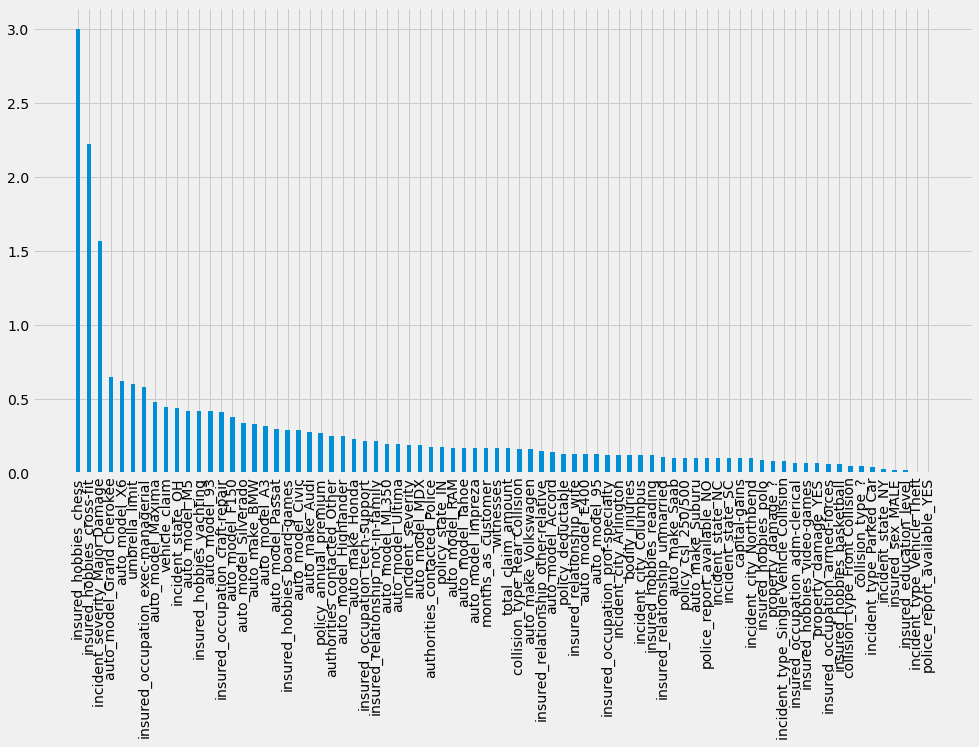

In [82]:
#Visualize the feature importance
plot_importance2(clf_SVM)

## 4)b)iv) Gradient Boosting (Oversampling)

In [83]:
steps = [('over', SMOTE()), ('model', GradientBoostingClassifier())]
clf_GB = Pipeline(steps=steps)

# evaluate pipeline
scores = cross_validate(clf_GB, X, y, scoring=scoring, cv=cv, n_jobs=-1)
print('Gradient Boosting (SMOTE)')
print('Mean F1 score: %.3f' % mean(scores['test_f1']))

#Scores
gb_scores_r = []
for i in keys:
    gb_scores_r.append(mean(scores[i]))

Gradient Boosting (SMOTE)
Mean F1 score: 0.676


In [84]:
#Check the feature importance
clf_GB = GradientBoostingClassifier()
clf_GB.fit(X,y)
check_importance(clf_GB)

,Feature,Feature Importance
75,incident_severity_Major Damage,0.37
46,insured_hobbies_chess,0.17
47,insured_hobbies_cross-fit,0.11
5,insured_zip,0.04
3,policy_annual_premium,0.03
...,...,...
56,insured_hobbies_reading,0.00
55,insured_hobbies_polo,0.00
54,insured_hobbies_paintball,0.00
53,insured_hobbies_movies,0.00


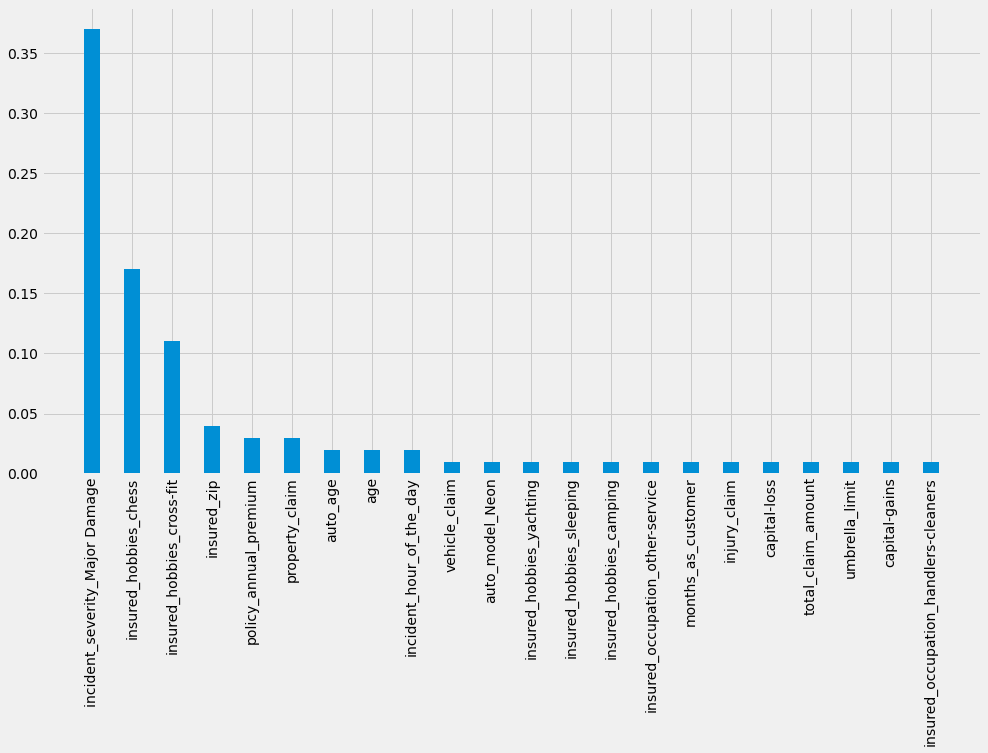

In [85]:
#Visualize the feature importance
plot_importance(clf_GB)

## 4)b)v) XGBoost (Oversampling)

In [86]:
steps = [('over', SMOTE()), ('model', XGBClassifier())]
clf_XGB = Pipeline(steps=steps)

# evaluate pipeline
scores = cross_validate(clf_XGB, X, y, scoring=scoring, cv=cv, n_jobs=-1)
print('XGBoost (SMOTE)')
print('Mean F1 score: %.3f' % mean(scores['test_f1']))

#Scores
xgb_scores_r = []
for i in keys:
    xgb_scores_r.append(mean(scores[i]))

XGBoost (SMOTE)
Mean F1 score: 0.637


In [87]:
#Check the feature importance
clf_GB = XGBClassifier()
clf_GB.fit(X,y)
check_importance(clf_GB)

,Feature,Feature Importance
75,incident_severity_Major Damage,0.10
46,insured_hobbies_chess,0.06
47,insured_hobbies_cross-fit,0.05
54,insured_hobbies_paintball,0.04
36,insured_occupation_prof-specialty,0.02
...,...,...
67,incident_type_Multi-vehicle Collision,0.00
64,insured_relationship_own-child,0.00
57,insured_hobbies_skydiving,0.00
56,insured_hobbies_reading,0.00


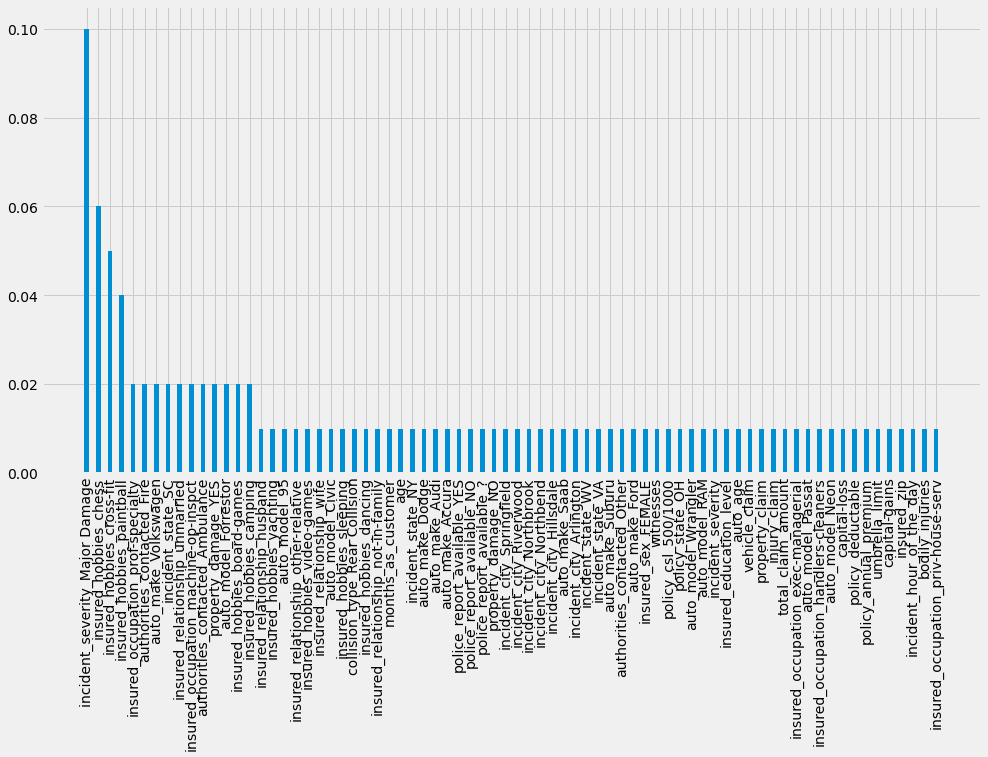

In [88]:
#Visualize the feature importance
plot_importance(clf_GB)

## 4)b)vi) Random Forest (Oversampling)

In [89]:
steps = [('over', SMOTE()), ('model', RandomForestClassifier())]
clf_RF = Pipeline(steps=steps)

# evaluate pipeline
scores = cross_validate(clf_RF, X, y, scoring=scoring, cv=cv, n_jobs=-1)
print('Random Forest (SMOTE)')
print('Mean F1 score: %.3f' % mean(scores['test_f1']))

#Scores
rf_scores_r = []
for i in keys:
    rf_scores_r.append(mean(scores[i]))

Random Forest (SMOTE)
Mean F1 score: 0.597


In [90]:
#Check the feature importance
clf_RF = RandomForestClassifier()
clf_RF.fit(X,y)
check_importance(clf_RF)

,Feature,Feature Importance
75,incident_severity_Major Damage,0.11
46,insured_hobbies_chess,0.05
18,incident_severity,0.05
12,total_claim_amount,0.03
1,age,0.03
...,...,...
59,insured_hobbies_video-games,0.00
58,insured_hobbies_sleeping,0.00
57,insured_hobbies_skydiving,0.00
56,insured_hobbies_reading,0.00


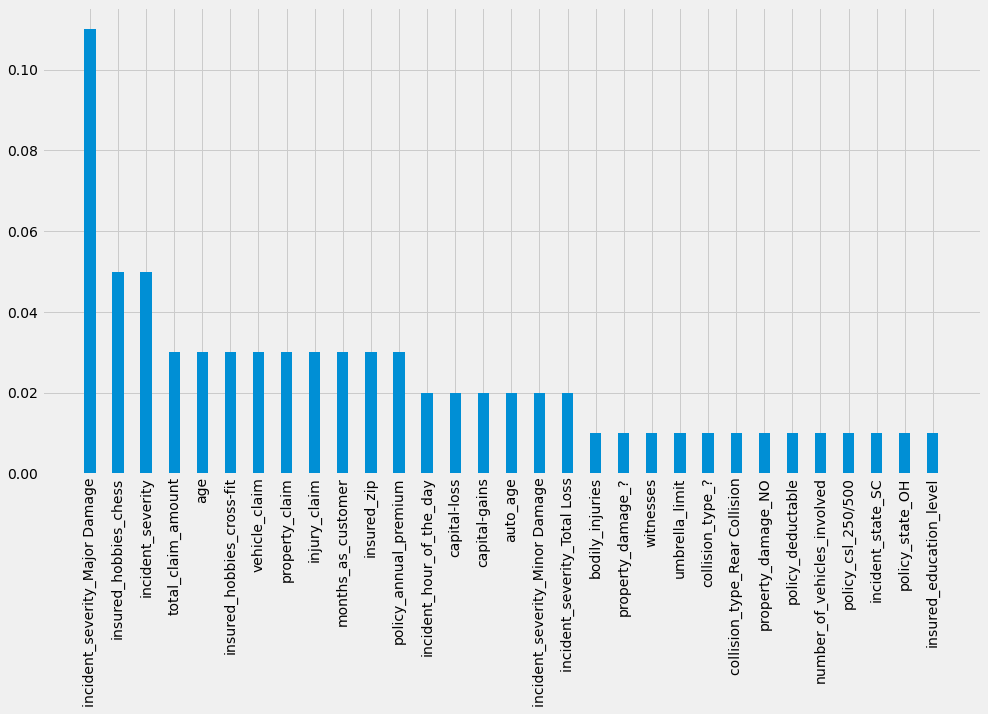

In [91]:
#Visualize the feature importance
plot_importance(clf_RF)

In [126]:
scores_2 = [("Random Forest", rf_scores_r[0], rf_scores_r[1], rf_scores_r[2], rf_scores_r[3]),
           ("Logistic Regression", lr_scores_r[0], lr_scores_r[1], lr_scores_r[2], lr_scores_r[3]),
           ("Decison Tree", dt_scores_r[0], dt_scores_r[1], dt_scores_r[2], dt_scores_r[3]),
           ("SVM", svm_scores_r[0], svm_scores_r[1], svm_scores_r[2], svm_scores_r[3]),
           ("Gradient Boosting", gb_scores_r[0], gb_scores_r[1], gb_scores_r[2], gb_scores_r[3]),
           ("XGBoost", xgb_scores_r[0], xgb_scores_r[1], xgb_scores_r[2], xgb_scores_r[3])]

Scores_2 =pd.DataFrame(data = scores_2, columns=['Model Name', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
Scores_2.set_index('Model Name', inplace = True)

display_side_by_side(Scores_2, titles=['Oversampling']) 

,Accuracy,Precision,Recall,F1 Score
Model Name,,,,
Random Forest,0.8046,0.611954,0.591300,0.597263
Logistic Regression,0.8254,0.667285,0.602133,0.627272
Decison Tree,0.7628,0.519400,0.617667,0.561498
SVM,0.8336,0.670163,0.658900,0.660046
Gradient Boosting,0.8328,0.652082,0.710700,0.676428
XGBoost,0.8230,0.650715,0.630400,0.636817


In [93]:
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

## Comparison

In [94]:
#Comparision 
display_side_by_side(Scores_,Scores_2, titles=['Original','Oversampling']) 

,Accuracy,Precision,Recall,F1 Score
Model Name,,,,
Random Forest,0.7886,0.600843,0.450633,0.508663
Logistic Regression,0.8226,0.665791,0.581167,0.615009
Decison Tree,0.7892,0.575663,0.573833,0.570867
SVM,0.8320,0.668412,0.652500,0.656027
Gradient Boosting,0.8276,0.643897,0.686533,0.661772
XGBoost,0.8158,0.636987,0.604500,0.616953
,Accuracy,Precision,Recall,F1 Score
Model Name,,,,
Random Forest,0.8046,0.611954,0.591300,0.597263


### Difference in % (Original vs Oversampling)

In [95]:
def diff(n1,n2):
    
    result = n1-n2
    result1 = "{:.2f}".format(result)
    if result > 0:
        return '+'+result1
    else:
        return '-'+result1

In [127]:
scores_3 = [("Random Forest", diff(rf_scores_r[0], rf_scores[0]), diff(rf_scores_r[1], rf_scores[1]), diff(rf_scores_r[2],rf_scores[2]), diff(rf_scores_r[3],rf_scores[3])),
           ("Logistic Regression", diff(lr_scores_r[0], lr_scores[0]), diff(lr_scores_r[1], lr_scores[1]), diff(lr_scores_r[2], lr_scores[2]), diff(lr_scores_r[3], lr_scores[3])),
           ("Decison Tree", diff(dt_scores_r[0], dt_scores[0]), diff(dt_scores_r[1], dt_scores[1]), diff(dt_scores_r[2], dt_scores[2]), diff(dt_scores_r[3], dt_scores[3])),
           ("SVM", diff(svm_scores_r[0], svm_scores[0]), diff(svm_scores_r[1], svm_scores[1]), diff(svm_scores_r[2], svm_scores[2]), diff(svm_scores_r[3], svm_scores[3])),
           ("Gradient Boosting", diff(gb_scores_r[0], gb_scores[0]), diff(gb_scores_r[1], gb_scores[1]), diff(gb_scores_r[2], gb_scores[2]), diff(gb_scores_r[3], gb_scores[3])),
           ("XGBoost", diff(xgb_scores_r[0], xgb_scores[0]), diff(xgb_scores_r[1], xgb_scores[1]), diff(xgb_scores_r[2], xgb_scores[2]), diff(xgb_scores_r[3], xgb_scores[3]))]

Scores_3 =pd.DataFrame(data = scores_3, columns=['Model Name', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
Scores_3.set_index('Model Name', inplace = True)


display_side_by_side(Scores_3,titles=['Difference in % (Original vs Oversampling)']) 

,Accuracy,Precision,Recall,F1 Score
Model Name,,,,
Random Forest,+0.02,+0.01,+0.14,+0.09
Logistic Regression,+0.00,+0.00,+0.02,+0.01
Decison Tree,--0.03,--0.06,+0.04,--0.01
SVM,+0.00,+0.00,+0.01,+0.00
Gradient Boosting,+0.01,+0.01,+0.02,+0.01
XGBoost,+0.01,+0.01,+0.03,+0.02


### Oversampling the imbalance dataset, the performance of the models improved slightly for all the proposed models expect Decision Tree

In [130]:
display_side_by_side(Scores_2, titles=['Oversampling']) 

,Accuracy,Precision,Recall,F1 Score
Model Name,,,,
Random Forest,0.8046,0.611954,0.591300,0.597263
Logistic Regression,0.8254,0.667285,0.602133,0.627272
Decison Tree,0.7628,0.519400,0.617667,0.561498
SVM,0.8336,0.670163,0.658900,0.660046
Gradient Boosting,0.8328,0.652082,0.710700,0.676428
XGBoost,0.8230,0.650715,0.630400,0.636817


### Oversampling:
### TOP 3 MODELS: Gradient Boosting, SVM, and XGBoost

## 4)c) Perfrom features selection by using Recursive feature elimination (RFE)

## 4)c)i) Logistic Regression (Features selection)

In [97]:
clf_LR = LogisticRegression(max_iter=1000)

#Feature selection
rfecv = RFECV(clf_LR, step=1, cv=2)


scores = cross_validate(rfecv, X, y, scoring=scoring, cv=cv, n_jobs=-1)
print('Logistic Regression (FS)')
print('Mean F1 score: %.3f' % mean(scores['test_f1']))

rfecv.fit(X.values,y.values)

#Scores
lr_scores_r_fs = []
for i in keys:
    lr_scores_r_fs.append(mean(scores[i]))

Logistic Regression (FS)
Mean F1 score: 0.709


In [98]:
#Top features
rf_df = pd.DataFrame(rfecv.ranking_,index=X.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rf_df.head()

,Rank
incident_severity_Major Damage,1
insured_hobbies_cross-fit,1
insured_hobbies_chess,1
insured_hobbies_camping,2
auto_model_Civic,3


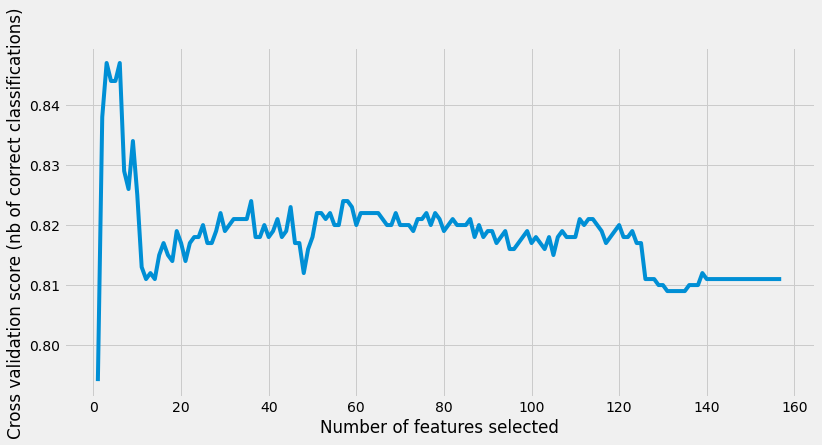

In [99]:
#Plot cross validation mean test score
plt.figure(figsize=(12,6))
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (nb of correct classifications)')
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

## 4)c)ii) Decision Tree (Features Selection)

In [102]:
clf_DT = DecisionTreeClassifier(criterion="entropy")

#Feature selection
rfecv = RFECV(clf_DT, step=1, cv=2)

scores = cross_validate(rfecv, X, y, scoring=scoring, cv=cv, n_jobs=-1)
print('Decision Tree (FS)')
print('Mean F1 score: %.3f' % mean(scores['test_f1']))

rfecv.fit(X.values,y.values)

#Scores
dt_scores_r_fs = []
for i in keys:
    dt_scores_r_fs.append(mean(scores[i]))

Decision Tree (FS)
Mean F1 score: 0.584


In [103]:
#Top features
rf_df = pd.DataFrame(rfecv.ranking_,index=X.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rf_df.head()

,Rank
months_as_customer,1
property_damage_NO,1
property_damage_?,1
incident_city_Riverwood,1
incident_city_Northbrook,1


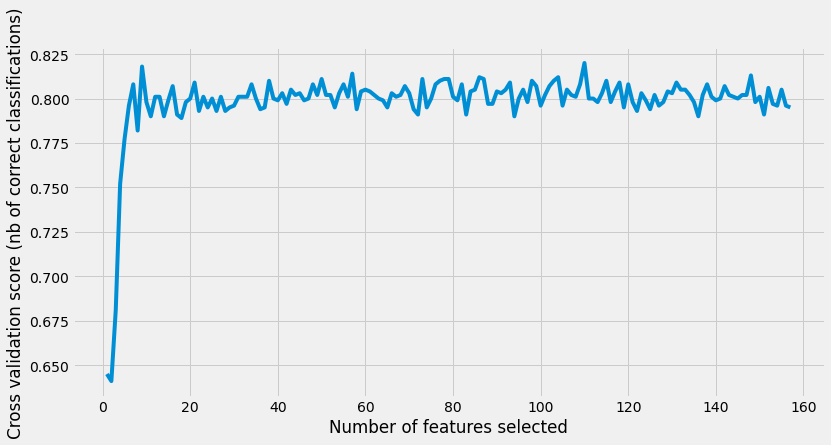

In [104]:
#Plot cross validation mean test score
plt.figure(figsize=(12,6))
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (nb of correct classifications)')
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

## 4)c)iii) SVM (Features Selection)

In [105]:
clf_SVM = svm.SVC(kernel='linear')

#Feature selection
rfecv = RFECV(clf_SVM, step=1, cv=2)

scores = cross_validate(rfecv, X, y, scoring=scoring, cv=cv, n_jobs=-1)
print('SVM (FS)')
print('Mean F1 score: %.3f' % mean(scores['test_f1']))

rfecv.fit(X.values,y.values)

#Scores
svm_scores_r_fs = []
for i in keys:
    svm_scores_r_fs.append(mean(scores[i]))

SVM (FS)
Mean F1 score: 0.709


In [106]:
#Top features
rf_df = pd.DataFrame(rfecv.ranking_,index=X.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rf_df.head()

,Rank
incident_severity_Trivial Damage,1
insured_hobbies_chess,1
insured_hobbies_cross-fit,1
insured_hobbies_dancing,1
insured_hobbies_golf,1


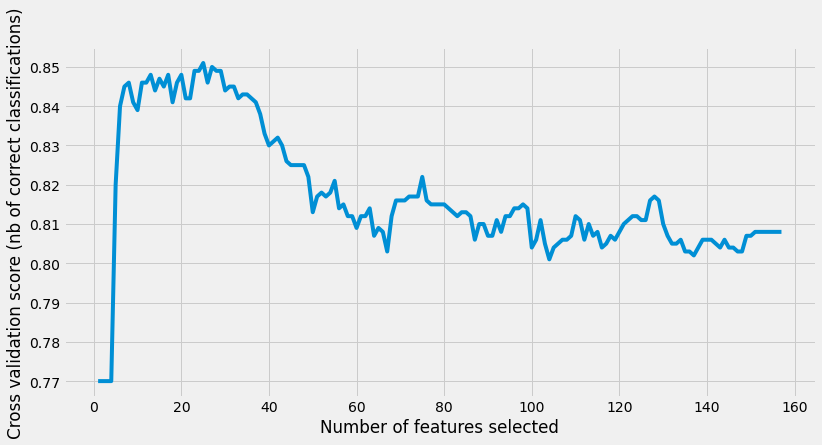

In [107]:
#Plot cross validation mean test score
plt.figure(figsize=(12,6))
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (nb of correct classifications)')
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

## 4)c)iv) Gradient Boosting (Features Selection)

In [108]:
clf_GB = GradientBoostingClassifier()

#Feature selection
rfecv = RFECV(clf_GB, step=1, cv=2)

scores = cross_validate(rfecv, X, y, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
print('Gradient Boosting (FS)')
print('Mean F1 score: %.3f' % mean(scores['test_f1']))

rfecv.fit(X.values,y.values)

#Scores
gb_scores_r_fs = []
for i in keys:
    gb_scores_r_fs.append(mean(scores[i]))

Gradient Boosting (FS)
Mean F1 score: 0.661


In [109]:
#Top features
rf_df = pd.DataFrame(rfecv.ranking_,index=X.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rf_df.head()

,Rank
months_as_customer,1
insured_hobbies_yachting,1
police_report_available_YES,1
property_damage_YES,1
insured_occupation_exec-managerial,1


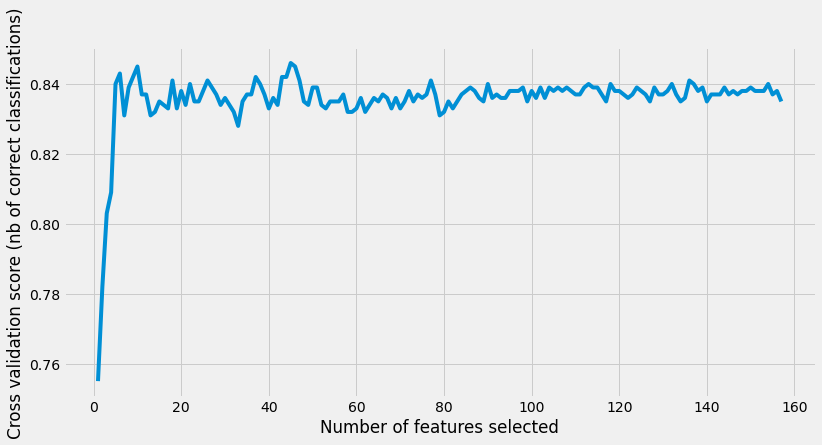

In [110]:
#Plot cross validation mean test score
plt.figure(figsize=(12,6))
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (nb of correct classifications)')
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

## 4)c)v) XGBoost (Features Selection)

In [111]:
clf_XGB = XGBClassifier()

#Feature selection
rfecv = RFECV(clf_XGB, step=1, cv=2)

scores = cross_validate(rfecv, X, y, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
print('XGBoosting (FS)')
print('Mean F1 score: %.3f' % mean(scores['test_f1']))

rfecv.fit(X.values,y.values)

#Scores
xgb_scores_r_fs = []
for i in keys:
    xgb_scores_r_fs.append(mean(scores[i]))

XGBoosting (FS)
Mean F1 score: 0.744


In [112]:
#Top features
rf_df = pd.DataFrame(rfecv.ranking_,index=X.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rf_df.head()

,Rank
insured_hobbies_chess,1
insured_hobbies_cross-fit,1
incident_severity_Major Damage,1
insured_hobbies_camping,2
insured_hobbies_yachting,3


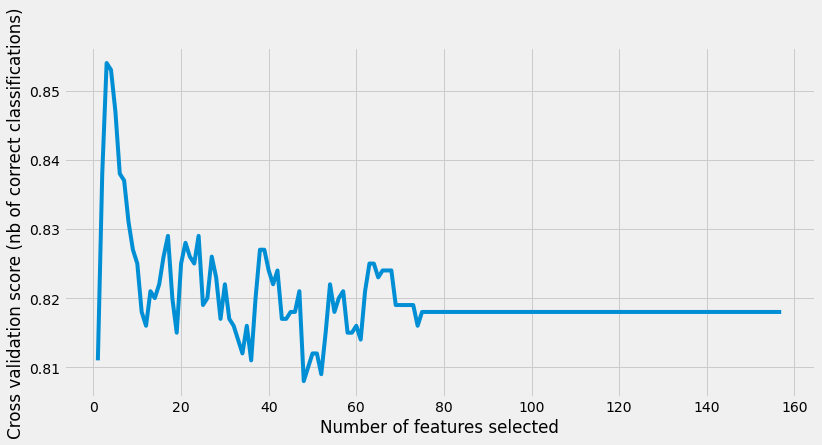

In [113]:
#Plot cross validation mean test score
plt.figure(figsize=(12,6))
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (nb of correct classifications)')
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

## 4)c)vi) Random Forest (Features Selection)

In [114]:
clf_RF = RandomForestClassifier()

#Feature selection
rfecv = RFECV(clf_RF, step=1, cv=2)

scores = cross_validate(rfecv, X, y, scoring=scoring, cv=cv, n_jobs=-1)
print('Random Forest (SMOTE + FS)')
print('Mean F1 score: %.3f' % mean(scores['test_f1']))

rfecv.fit(X.values,y.values)

#Scores
rf_scores_r_fs = []
for i in keys:
    rf_scores_r_fs.append(mean(scores[i]))

Random Forest (SMOTE + FS)
Mean F1 score: 0.668


In [115]:
#Top features
rf_df = pd.DataFrame(rfecv.ranking_,index=X.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rf_df.head()

,Rank
months_as_customer,1
incident_severity_Major Damage,1
incident_severity_Minor Damage,1
incident_severity_Total Loss,1
incident_severity,1


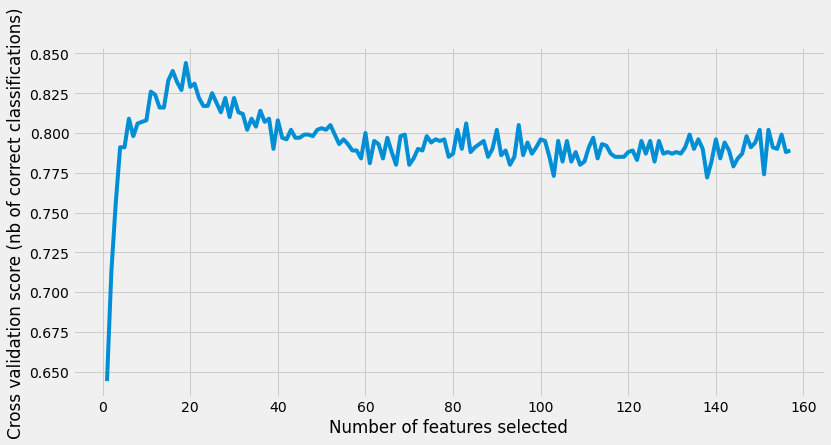

In [116]:
#Plot cross validation mean test score
plt.figure(figsize=(12,6))
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (nb of correct classifications)')
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

## We will expect increment in the evaluation metrics for the proposed models

In [124]:
scores_4 = [("Random Forest", rf_scores_r_fs[0], rf_scores_r_fs[1], rf_scores_r_fs[2], rf_scores_r_fs[3]),
           ("Logistic Regression", lr_scores_r_fs[0], lr_scores_r_fs[1], lr_scores_r_fs[2], lr_scores_r_fs[3]),
           ("Decison Tree", dt_scores_r_fs[0], dt_scores_r_fs[1], dt_scores_r_fs[2], dt_scores_r_fs[3]),
           ("SVM", svm_scores_r_fs[0], svm_scores_r_fs[1], svm_scores_r_fs[2], svm_scores_r_fs[3]),
           ("Gradient Boosting", gb_scores_r_fs[0], gb_scores_r_fs[1], gb_scores_r_fs[2], gb_scores_r_fs[3]),
           ("XGBoost", xgb_scores_r_fs[0], xgb_scores_r_fs[1], xgb_scores_r_fs[2], xgb_scores_r_fs[3])]

Scores_4 =pd.DataFrame(data = scores_4, columns=['Model Name', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
Scores_4.set_index('Model Name', inplace = True)

### Comparison for Original, Oversampling and Features Selection

In [118]:
display_side_by_side(Scores_,Scores_2,Scores_4, titles=['Original','Oversampling','Features Selection']) 

,Accuracy,Precision,Recall,F1 Score
Model Name,,,,
Random Forest,0.7886,0.600843,0.450633,0.508663
Logistic Regression,0.8226,0.665791,0.581167,0.615009
Decison Tree,0.7892,0.575663,0.573833,0.570867
SVM,0.8320,0.668412,0.652500,0.656027
Gradient Boosting,0.8276,0.643897,0.686533,0.661772
XGBoost,0.8158,0.636987,0.604500,0.616953
,Accuracy,Precision,Recall,F1 Score
Model Name,,,,
Random Forest,0.8046,0.611954,0.591300,0.597263


### Difference in % (Original vs Features Selection)

In [129]:
scores_5 = [("Random Forest", diff(rf_scores_r_fs[0], rf_scores[0]), diff(rf_scores_r_fs[1], rf_scores[1]), diff(rf_scores_r_fs[2],rf_scores[2]), diff(rf_scores_r_fs[3],rf_scores[3])),
           ("Logistic Regression", diff(lr_scores_r_fs[0], lr_scores[0]), diff(lr_scores_r_fs[1], lr_scores[1]), diff(lr_scores_r_fs[2], lr_scores[2]), diff(lr_scores_r_fs[3], lr_scores[3])),
           ("Decison Tree", diff(dt_scores_r_fs[0], dt_scores[0]), diff(dt_scores_r_fs[1], dt_scores[1]), diff(dt_scores_r_fs[2], dt_scores[2]), diff(dt_scores_r_fs[3], dt_scores[3])),
           ("SVM", diff(svm_scores_r_fs[0], svm_scores[0]), diff(svm_scores_r_fs[1], svm_scores[1]), diff(svm_scores_r_fs[2], svm_scores[2]), diff(svm_scores_r_fs[3], svm_scores[3])),
           ("Gradient Boosting", diff(gb_scores_r_fs[0], gb_scores[0]), diff(gb_scores_r_fs[1], gb_scores[1]), diff(gb_scores_r_fs[2], gb_scores[2]), diff(gb_scores_r_fs[3], gb_scores[3])),
           ("XGBoost", diff(xgb_scores_r_fs[0], xgb_scores[0]), diff(xgb_scores_r_fs[1], xgb_scores[1]), diff(xgb_scores_r_fs[2], xgb_scores[2]), diff(xgb_scores_r_fs[3], xgb_scores[3]))]

Scores_5 =pd.DataFrame(data = scores_5, columns=['Model Name', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
Scores_5.set_index('Model Name', inplace = True)

display_side_by_side(Scores_5, titles=['Difference in % (Original vs Features Selection)']) 

,Accuracy,Precision,Recall,F1 Score
Model Name,,,,
Random Forest,+0.04,+0.05,+0.25,+0.16
Logistic Regression,+0.02,--0.02,+0.22,+0.09
Decison Tree,+0.01,+0.01,+0.01,+0.01
SVM,+0.01,+0.00,+0.11,+0.05
Gradient Boosting,+0.00,+0.01,--0.01,--0.00
XGBoost,+0.04,+0.02,+0.27,+0.13


In [120]:
display_side_by_side(Scores_3,Scores_5, titles=['Original vs Oversampling','Original vs Features Selection']) 

,Accuracy,Precision,Recall,F1 Score
Model Name,,,,
Random Forest,+0.02,+0.01,+0.14,+0.09
Logistic Regression,+0.00,+0.00,+0.02,+0.01
Decison Tree,--0.03,--0.06,+0.04,--0.01
SVM,+0.00,+0.00,+0.01,+0.00
Gradient Boosting,+0.01,+0.01,+0.02,+0.01
XGBoost,+0.01,+0.01,+0.03,+0.02
,Accuracy,Precision,Recall,F1 Score
Model Name,,,,
Random Forest,+0.04,+0.05,+0.25,+0.16


### In general, in term of F1 score, the models show better improvement for Feature selections compared to Oversampling

In [122]:
display_side_by_side(Scores_4, titles=['Features Selection']) 

,Accuracy,Precision,Recall,F1 Score
Model Name,,,,
Random Forest,0.8304,0.649175,0.696800,0.668444
Logistic Regression,0.8420,0.648891,0.804067,0.708928
Decison Tree,0.7952,0.589022,0.586333,0.583685
SVM,0.8454,0.668559,0.763267,0.708648
Gradient Boosting,0.8296,0.653282,0.677600,0.661498
XGBoost,0.8514,0.652052,0.870967,0.743779


### Features Selection:
### TOP 3 MODELS are XGBoost, Logistic Regression, and SVM. 
#### XGBoost with features selection showed: ------------------ +4% in acc, +2% in precision, +27% in recall, +13% in F1
#### Logistic Regression with features selection showed: --- +2% in acc, -2% in precision, +22% in recall, +9% in F1
#### SVM with features selection showed: ------------------------- +1% in acc, +0% in precision, +11% in recall, +5% in F1

## Conclusion:
### In comparison for the 6 models for original, oversampling and features selection.
### TOP 1: XGBoost (Features Selection) -------------------- Acc: 85.14%, F1: 74.38%
### TOP 2: SVM (Features Selection) -------------------------- Acc: 84.54%, F1: 70.86%
### TOP 3: Logistic Regression (Features Selection) ---- Acc: 84.20%, F1: 70.89%



# Extra: Ensemble Learning

F1 scores
>lr 0.615 (0.061)
>dt 0.586 (0.061)
>svm 0.659 (0.049)
>gb 0.658 (0.069)
>xgb 0.621 (0.059)
>rf 0.504 (0.065)
>stacking 0.640 (0.053)


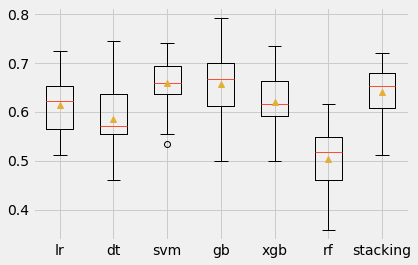

In [121]:
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.ensemble import StackingClassifier


# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression(max_iter=1000)))
    level0.append(('cart', DecisionTreeClassifier(criterion="entropy")))
    level0.append(('svm', svm.SVC(kernel='linear')))
    level0.append(('gb', GradientBoostingClassifier()))
    level0.append(('xgb',XGBClassifier()))
    level0.append(('rf',RandomForestClassifier()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model


# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression(max_iter=1000)
    models['dt'] = DecisionTreeClassifier(criterion="entropy")
    models['svm'] = svm.SVC(kernel='linear')
    models['gb'] = GradientBoostingClassifier()
    models['xgb'] = XGBClassifier()
    models['rf'] = RandomForestClassifier()
    models['stacking'] = get_stacking()
    return models


# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
    return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
print('F1 scores')
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

## Since the F1 score for the stacking model is lower than SVM & Gradient Boosting so there is no reason to use the stacking model.